# Term Deposit Marketing - An Apziva Project

By Samuel Alter

Apziva: G3SuQYZYrFt9dwF3

## Project Overview

Using phone call data from a European bank, this project will be building a model that predicts if a customer will subscribe to a term deposit, a type of financial product. This project is a partnership with a startup focused on providing ML solutions for European banks.

### Goals

The startup is hoping that I can **achieve ≥81% accuracy** using a 5-fold cross validation strategy, taking the average performance score.

Bonus goals include:
* Determining which customers are most likely to buy the term deposit loan
  * Which segments of customers should the client prioritize?
* Determine what makes the customer buy the loan
  * Which feature should the startup focus on?

### The dataset

Using phone call data from a European bank, this project will be building models that predict if a customer will subscribe to a term deposit, a type of financial product. This project is a partnership with a startup focused on providing ML solutions for European banks.

The dataset consists of the following columns:
* `age`
  * Numeric
  * The age of the customer
* `job`
  * Categorical
  * The job category of the customer
* `marital`
  * Categorical
  * Whether the customer is married
* `education`
  * Categorical
  * The customer's level of education
* `default`
  * Binary
  * If the customer has credit in default or not
* `balance`
  * Numeric
  * Average yearly balance in Euros
* `housing`
  * Binary
  * If the customer has a housing loan or not
* `loan`
  * Binary
  * If the customer has a personal loan
* `contact`
  * Categorical
  * The type of contact communication
* `day`
  * Numeric
  * Last contact day of the month
* `month`
  * Categorical
  * Last contact month of the year
* `duration`
  * Numeric
  * Duration of the last phone call with the customer
* `campaign`
  * Numeric
  * The number of contacts performed during this campaign and for this client, which includes the last contact

The final column, `y`, is the target of the dataset and shows whether the client subscribed to a term deposit.

## Table of Contents

1. [EDA](#eda)
 * [Non-visual data analysis](#neda) of the data: check `dtype`, look at broad trends in data
 * [Visualization](#viz) of the data
   * [Figure 1: Barplots of **categorical** features](#fig1)
   * [Figure 2: Histograms of **continuous** features](#fig2)
   * [Figure 3: Boxplots of **continuous** features](#fig3)
   * [Figure 4: Correlation matrix of **continuous** features](#fig4)
   * [Figure 5: Correlation matrix of **categorical** features](#fig5)
   * What about [scatterplots?](#scat)
2. [Modeling](#mod)

## Imports and Helper Functions

In [ ]:
# ignore warnings for seaborn
import warnings
warnings.filterwarnings("ignore", module="seaborn")

In [ ]:
!python --version

/usr/bin/sh: 1: python: not found


In [ ]:
!pip list

Package              Version
-------------------- -----------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.8
attrs                22.1.0
auto-sklearn         0.15.0
backcall             0.2.0
beautifulsoup4       4.11.1
black                22.8.0
bleach               5.0.1
certifi              2022.9.14
cffi                 1.15.1
cfgv                 3.3.1
charset-normalizer   2.1.1
click                8.1.3
cloudpickle          2.2.0
ConfigSpace          0.4.21
contourpy            1.0.5
coverage             6.4.4
cycler               0.11.0
Cython               0.29.32
dask                 2022.9.1
debugpy              1.6.3
decopatch            1.4.10
decorator            5.1.1
defusedxml           0.7.1
distlib              0.3.6
distributed          2022.9.1
distro               1.7.0
emcee                3.1.2
entrypoints          0.4
execnet              1.9.0
executing            1.0.0
fastjsonschema       2.16.2
filelock             3.8.0

In [ ]:
import subprocess

# Run `pip list` and capture the output
pip_list_output = subprocess.check_output(['pip', 'list']).decode('utf-8')

# List of packages to check
required_packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scikit-learn', 'auto-sklearn']

# Check if the required packages are in the pip list output
for package in required_packages:
    if package in pip_list_output:
        print(f"{package} is installed.")
    else:
        print(f"{package} is NOT installed.")

numpy is installed.
pandas is installed.
matplotlib is installed.
seaborn is installed.
scikit-learn is installed.
auto-sklearn is installed.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import joblib
import time
import threading
from datetime import datetime
from contextlib import contextmanager
from timeit import default_timer

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
# from pycaret.classification import setup,compare_models,create_model,plot_model,evaluate_model
# from pycaret.regression import *

# from autosklearn.classification import AutoSklearnClassifier
import optuna

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# import sklearn.lda.LDA as LDA # <-- this is throwing the ModuleNotFoundError

/Applications/Anaconda/anaconda3/envs/apziva/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# simple function to generate random integers

def rand_gen(low=1,high=1e4):
    '''
    Generates a pseudo-random integer
    consisting of up to four digits
    '''
    rng=np.random.default_rng()
    random_state=int(rng.integers(low=low,high=high))

    # set the randomness seed throughout the notebook
    # source: # https://odsc.medium.com/properly-setting-the-random-seed-in-ml-experiments-not-as-simple-as-you-might-imagine-219969c84752

    ## set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED']=str(seed)
    ## set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(seed)
    ## set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(seed)
    np.random.default_rng(seed)

    return random_state

In [124]:
import json
from pathlib import Path
import inspect

def get_variable_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [name for name, val in callers_local_vars if val is var]

def fileDaterSaver(location: str,
                   filetype: str,
                   object_,
                   extra: str = '',
                   verbose: bool = True):

    '''
    Function that gets a timestamped filename and saves it
    to a user-specified location.

    Parameters:
    -----------
    location: str - The location where the file will be saved.
    filetype: str - The type of the file to save ('csv' or 'json').
    object_: The object to be saved. Should be a pandas DataFrame
        for 'csv' or serializable for 'json'.
    extra: str - Additional string to include in the filename.
    verbose: bool - Whether to print verbose messages.
    '''

    # get current date and time
    current_datetime = datetime.now()

    # print current date and time to check
    if verbose:
        print('current_datetime:', current_datetime)

    # format the datetime for a filename
    datetime_suffix = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

    # create filename with the datetime suffix
    if extra != '':
        file_name = f'{location}{extra}_{datetime_suffix}.{filetype}'
    else:
        file_name = f'{location}{datetime_suffix}.{filetype}'

    # print file name
    if verbose:
        print(file_name)

    # save object
    if filetype == 'csv':
        object_.to_csv(file_name, index=True)
    elif filetype == 'json':
        with open(file_name, 'w') as file:
            file.write(json.dumps(object_, default=str))
    else:
        raise ValueError("Unsupported file type. Use 'csv' or 'json'.")

    # confirm save
    file_path = Path(file_name)
    if file_path.exists():
        variable_name = get_variable_name(object_)
        if variable_name:
            print(f'Successfully saved {variable_name[0]} to {file_path}')
        else:
            print(f'Successfully saved object to {file_path}')
    else:
        print("File save error.")

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    SOURCE: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
seed=rand_gen()
seed

6532

In [ ]:
test_size=0.2
test_size

0.2

In [ ]:
# from google.colab import files
# uploaded=files.upload()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df=pd.read_csv('/content/drive/MyDrive/2_data.csv')
# df.head(3)

In [ ]:
# url=''
# df=pd.read_csv(url)
# df.head(3)

In [ ]:
# if not in Google Colab:

# read in data
df=pd.read_csv('../data/2_data.csv')
df.head(3)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no

In [ ]:
# !pip install -U -q PyDrive2
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# link='https://drive.google.com/file/d/1uIUzYWMQA_hl1odTnBTfwCV4m8K8BqMt/view?usp=share_link'
# df=pd.read_csv(link)
# df.head(3)

## EDA <a name='eda'></a>

### Non-visual data analysis <a name='neda'></a>

In [ ]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 40000 rows and 14 columns in the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


There are no nulls in the dataset, which makes our lives easier.

In [ ]:
df.describe()

age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000

We can glean the following insights from this table:
* The mean values for the `age`, `day`, and `campaign` columns are about equal to the 50th percentile
  * The distribution of the data may be symmetric
* The max value in each column besides `age` and `day` is much larger than the column's 75th percentile
  * This suggests there could be outliers
  * `age` and `day` are more or less categorical, so it makes sense that the max age is 95 and max day is 31

What if we compare the subset of the data that had a positive `y` outcome to those that had a negative outcome?

In [ ]:
# customers in the dataset who did get a loan
df_yes = df[df['y'] == 'yes']
df_yes.describe()

age       balance          day     duration     campaign
count  2896.000000   2896.000000  2896.000000  2896.000000  2896.000000
mean     39.844959   1588.495856    15.827003   682.958564     2.414365
std      11.001984   2924.894429     8.557604   431.287174     2.306015
min      19.000000  -3058.000000     1.000000     8.000000     1.000000
25%      31.000000    141.000000     8.000000   364.000000     1.000000
50%      37.000000    620.000000    16.000000   629.000000     2.000000
75%      47.000000   1820.500000    22.000000   913.000000     3.000000
max      95.000000  45248.000000    31.000000  3881.000000    32.000000

In [ ]:
# customers in the dataset who did not get a loan
df_no = df[df['y'] == 'no']
df_no.describe()

age        balance           day      duration      campaign
count  37104.000000   37104.000000  37104.000000  37104.000000  37104.000000
mean      40.599208    1249.752533     16.032072    221.408042      2.918688
std        9.525450    2900.722436      8.255850    206.360022      3.298031
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      50.000000      8.000000     95.000000      1.000000
50%       39.000000     395.000000     17.000000    164.000000      2.000000
75%       48.000000    1286.000000     21.000000    280.000000      3.000000
max       94.000000  102127.000000     31.000000   4918.000000     63.000000

In [ ]:
print(f"{df_yes.shape[0]/df.shape[0]*100}% of the customers received loans, while {round(df_no.shape[0]/df.shape[0]*100,2)}% of the customers did not receive loans.")

7.24% of the customers received loans, while 92.76% of the customers did not receive loans.


We can see:
* There is a large class imbalance in the dataset
* The mean values are roughly the same across the numerical columns and loan outcomes
  * Except for duration, which is about 3x as less for calls that don't end with a sale (`y`=no)
* The max values for `balance` and `campaign` are about 2.25x and 2x as large for `y`=no

Let's do some more aggregations to tease apart the differences between the different classes within each column.

In [ ]:
# functions to compute the quantiles

def q25(x):
    return x.quantile(0.25)

def q50(x):
    return x.quantile(0.50)

def q75(x):
    return x.quantile(0.75)

def iqr(x):
    return q75(x)-q25(x)

We can edit this code to slice and dice the dataset as we please:

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [ ]:
groupby_list=['count','mean','std','min',q25,q50,q75,iqr]
df.groupby([
    # 'age',
    'job',
    # 'marital',
    # 'education',
    # 'default',
    # 'housing',
    # 'loan',
    # 'contact',
    # 'day',
    # 'month',
    # 'y'
]).agg(
    {
        'balance':groupby_list,
        # 'duration':groupby_list,
        # 'campaign':groupby_list
    })

balance                                                         \
                count         mean          std   min     q25    q50     q75   
job                                                                            
admin            4483  1071.794111  2633.643058 -1601   44.50  375.0  1114.0   
blue-collar      9383  1056.803155  2206.054343 -8019   51.00  377.0  1158.5   
entrepreneur     1405  1452.220641  3922.060541 -2082   37.00  341.0  1249.0   
housemaid        1087  1327.157314  2939.895734 -1941   50.00  390.0  1334.5   
management       8166  1688.052902  3849.616616 -6847   72.00  518.0  1691.0   
retired          1437  1513.709116  3133.081518 -1598   79.00  514.0  1640.0   
self-employed    1414  1513.509194  3235.335044 -3313   96.25  472.0  1498.0   
services         3910   977.701279  2163.973389 -2122   28.00  324.0  1045.0   
student           524  1288.769084  2412.317764  -679  140.75  478.0  1444.0   
technician       6852  1193.454320  2526.033389 -2827   49.00  387.5  1228.5   
unemployed       1104  1446.983696  3001.613418 -1270   75.00  487.5  1592.5   
unknown           235  1677.391489  2887.377673  -295  130.50  666.0  2093.5   

                        
                   iqr  
job                     
admin          1069.50  
blue-collar    1107.50  
entrepreneur   1212.00  
housemaid      1284.50  
management     1619.00  
retired        1561.00  
self-employed  1401.75  
services       1017.00  
student        1303.25  
technician     1179.50  
unemployed     1517.50  
unknown        1963.00

There are different mean balances depending on what job the customer is in, which is to be expected: a blue-collar worker is not typically making the same amount of money that someone in management makes, so the balance in their bank account would be different too.

In [ ]:
# create dictionary of unique values
dict_unique={col:df[col].nunique() for col in df.columns}

# this is a little unwieldy
# but it will give us a sense of
# HOW MANY unique values there are
dict_unique

{'age': 70,
 'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'balance': 6849,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'day': 31,
 'month': 11,
 'duration': 1535,
 'campaign': 48,
 'y': 2}

We can tell which columns are categorical. For example, there are...
* 12 kinds of jobs
* 4 education levels  

...in the datset

In [ ]:
# create dictionary of unique values
dict_nunique={col:df[col].unique() for col in df.columns}

# this is a little unwieldy
# but it will give us a sense of
# WHAT the unique values are
dict_nunique

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81]),
 'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([  2143,     29,      2, ...,   7222,   3402, 102127]),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object),
 'day': array([ 5,  6,  7,  8

Nothing too surprising jumps out at us here, so we'll need to use more... _visual_ methods to understand the dataset.

### Visualization <a name='viz'></a>

#### Figure 1: Barplots of Categorical features <a name='fig1'></a>

Make a big figure with all the categorical features:
* `job`
* `marital`
* `education`
* `default`
* `housing`
* `loan`
* `contact`
* `day`
* `month`

In [ ]:
# make dictionary of just the categorical variables
cat_nunique=copy.deepcopy(dict_nunique)
del cat_nunique['age']
del cat_nunique['balance']
del cat_nunique['duration']
del cat_nunique['campaign']
del cat_nunique['y']
cat_nunique={key: sorted(value) for key, value in cat_nunique.items()}
print(cat_nunique)

{'job': ['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'], 'marital': ['divorced', 'married', 'single'], 'education': ['primary', 'secondary', 'tertiary', 'unknown'], 'default': ['no', 'yes'], 'housing': ['no', 'yes'], 'loan': ['no', 'yes'], 'contact': ['cellular', 'telephone', 'unknown'], 'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'month': ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct']}


In [ ]:
job_order=list(df['job'].unique())
job_order.sort()
job_order

['admin',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown']

In [ ]:
cat_nunique['month']=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

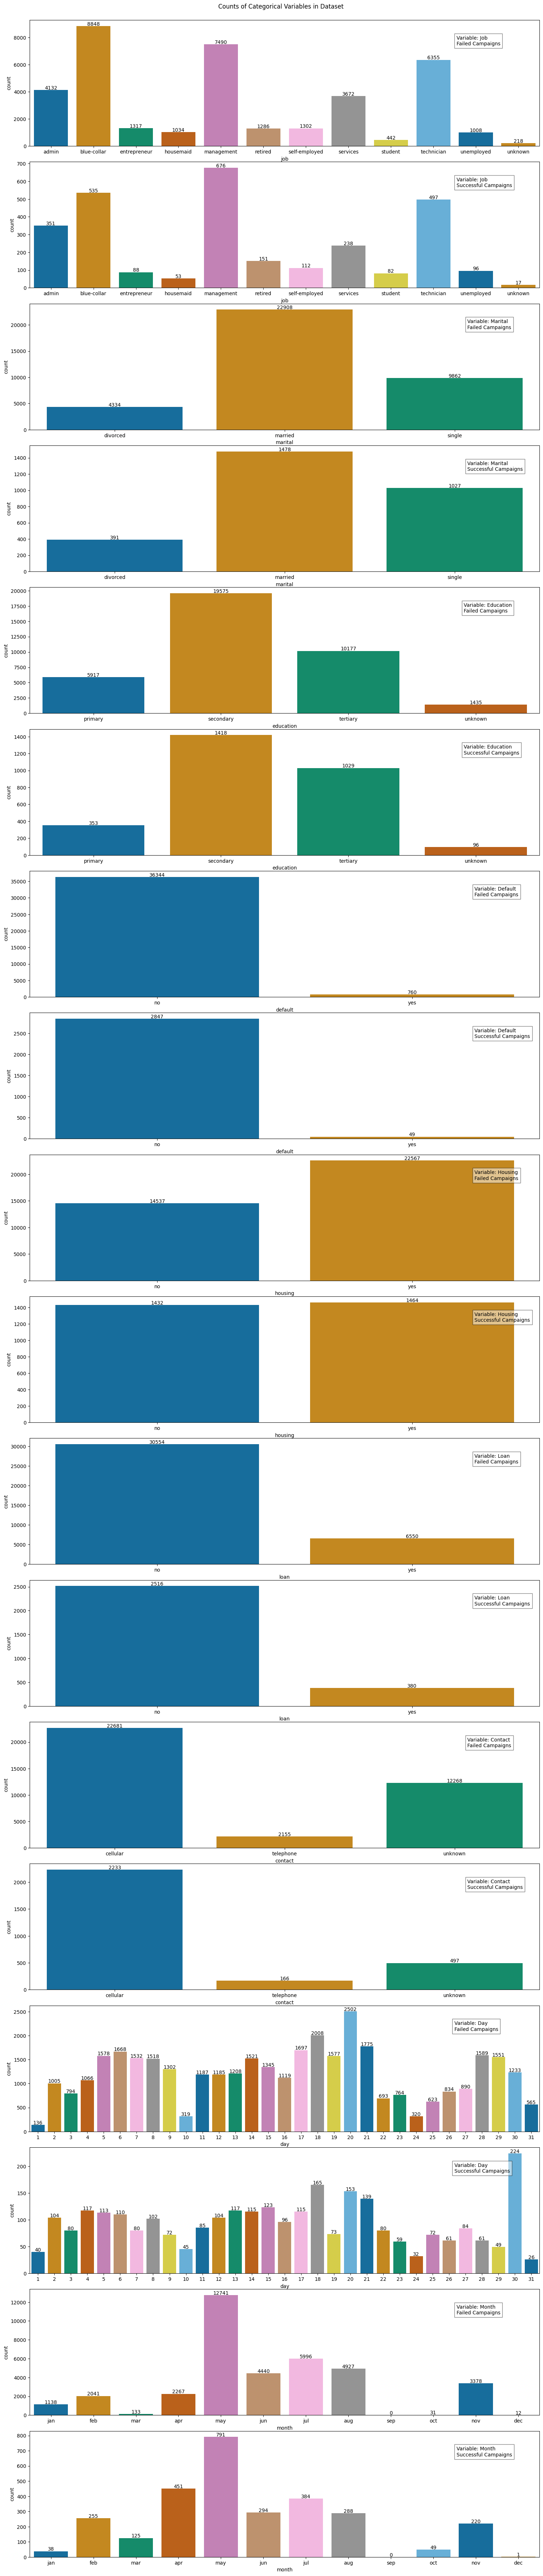

In [ ]:
# get total number of plots
num_plots=len(cat_nunique)*2

# create subplots
fig,axes=plt.subplots(num_plots,1,figsize=(15,num_plots*4))
plt.suptitle(t='Counts of Categorical Variables in Dataset',y=.999)
plt.tight_layout()

# flatten axes for easy indexing
axes=axes.flatten()

# plot each column
for i, (col, order) in enumerate(cat_nunique.items()):
#     plot 'no' part
    ax1=sns.countplot(data=df_no,x=col,palette='colorblind', dodge=True, order=order,ax=axes[i*2])
    # ax1.set_title(f'{col.capitalize()} Distribution for Failed Campaigns')
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 4),
                     textcoords = 'offset points')
    ax1.text(ax1.get_xlim()[1]+(ax1.get_xlim()[1])*(-0.17),
             ax1.get_ylim()[1] - (ax1.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nFailed Campaigns', bbox=dict(facecolor='white', alpha=0.5))

    # Plot 'yes' part
    ax2 = sns.countplot(data=df_yes,x=col,palette='colorblind',dodge=True,order=order,ax=axes[i*2 + 1])
    # ax2.set_title(f'{col.capitalize()} Distribution for Successful Campaigns')
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 4),
                     textcoords = 'offset points')
    ax2.text(ax2.get_xlim()[1]+(ax2.get_xlim()[1])*(-0.17),
             ax2.get_ylim()[1] - (ax2.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nSuccessful Campaigns', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('../figs/2_countcategorical.pdf')
plt.savefig('../figs/2_countcategorical.png')
plt.show()

There is a lot to observe here, but note that although the values differ drastically between successful and failed campaigns, the patterns are similar for most of the features.

Also notable is that there were no calls made to customers in the month of September.

#### Figure 2: Histograms of Continuous Features <a name='fig2'></a>

In [ ]:
# make dictionary of just the categorical variables
num_nunique=copy.deepcopy(dict_nunique)
del num_nunique['job']
del num_nunique['marital']
del num_nunique['education']
del num_nunique['default']
del num_nunique['housing']
del num_nunique['loan']
del num_nunique['contact']
del num_nunique['day']
del num_nunique['month']
del num_nunique['y']
num_nunique

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81]),
 'balance': array([  2143,     29,      2, ...,   7222,   3402, 102127]),
 'duration': array([ 261,  151,   76, ..., 1880, 1460, 2219]),
 'campaign': array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
        32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
        20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])}

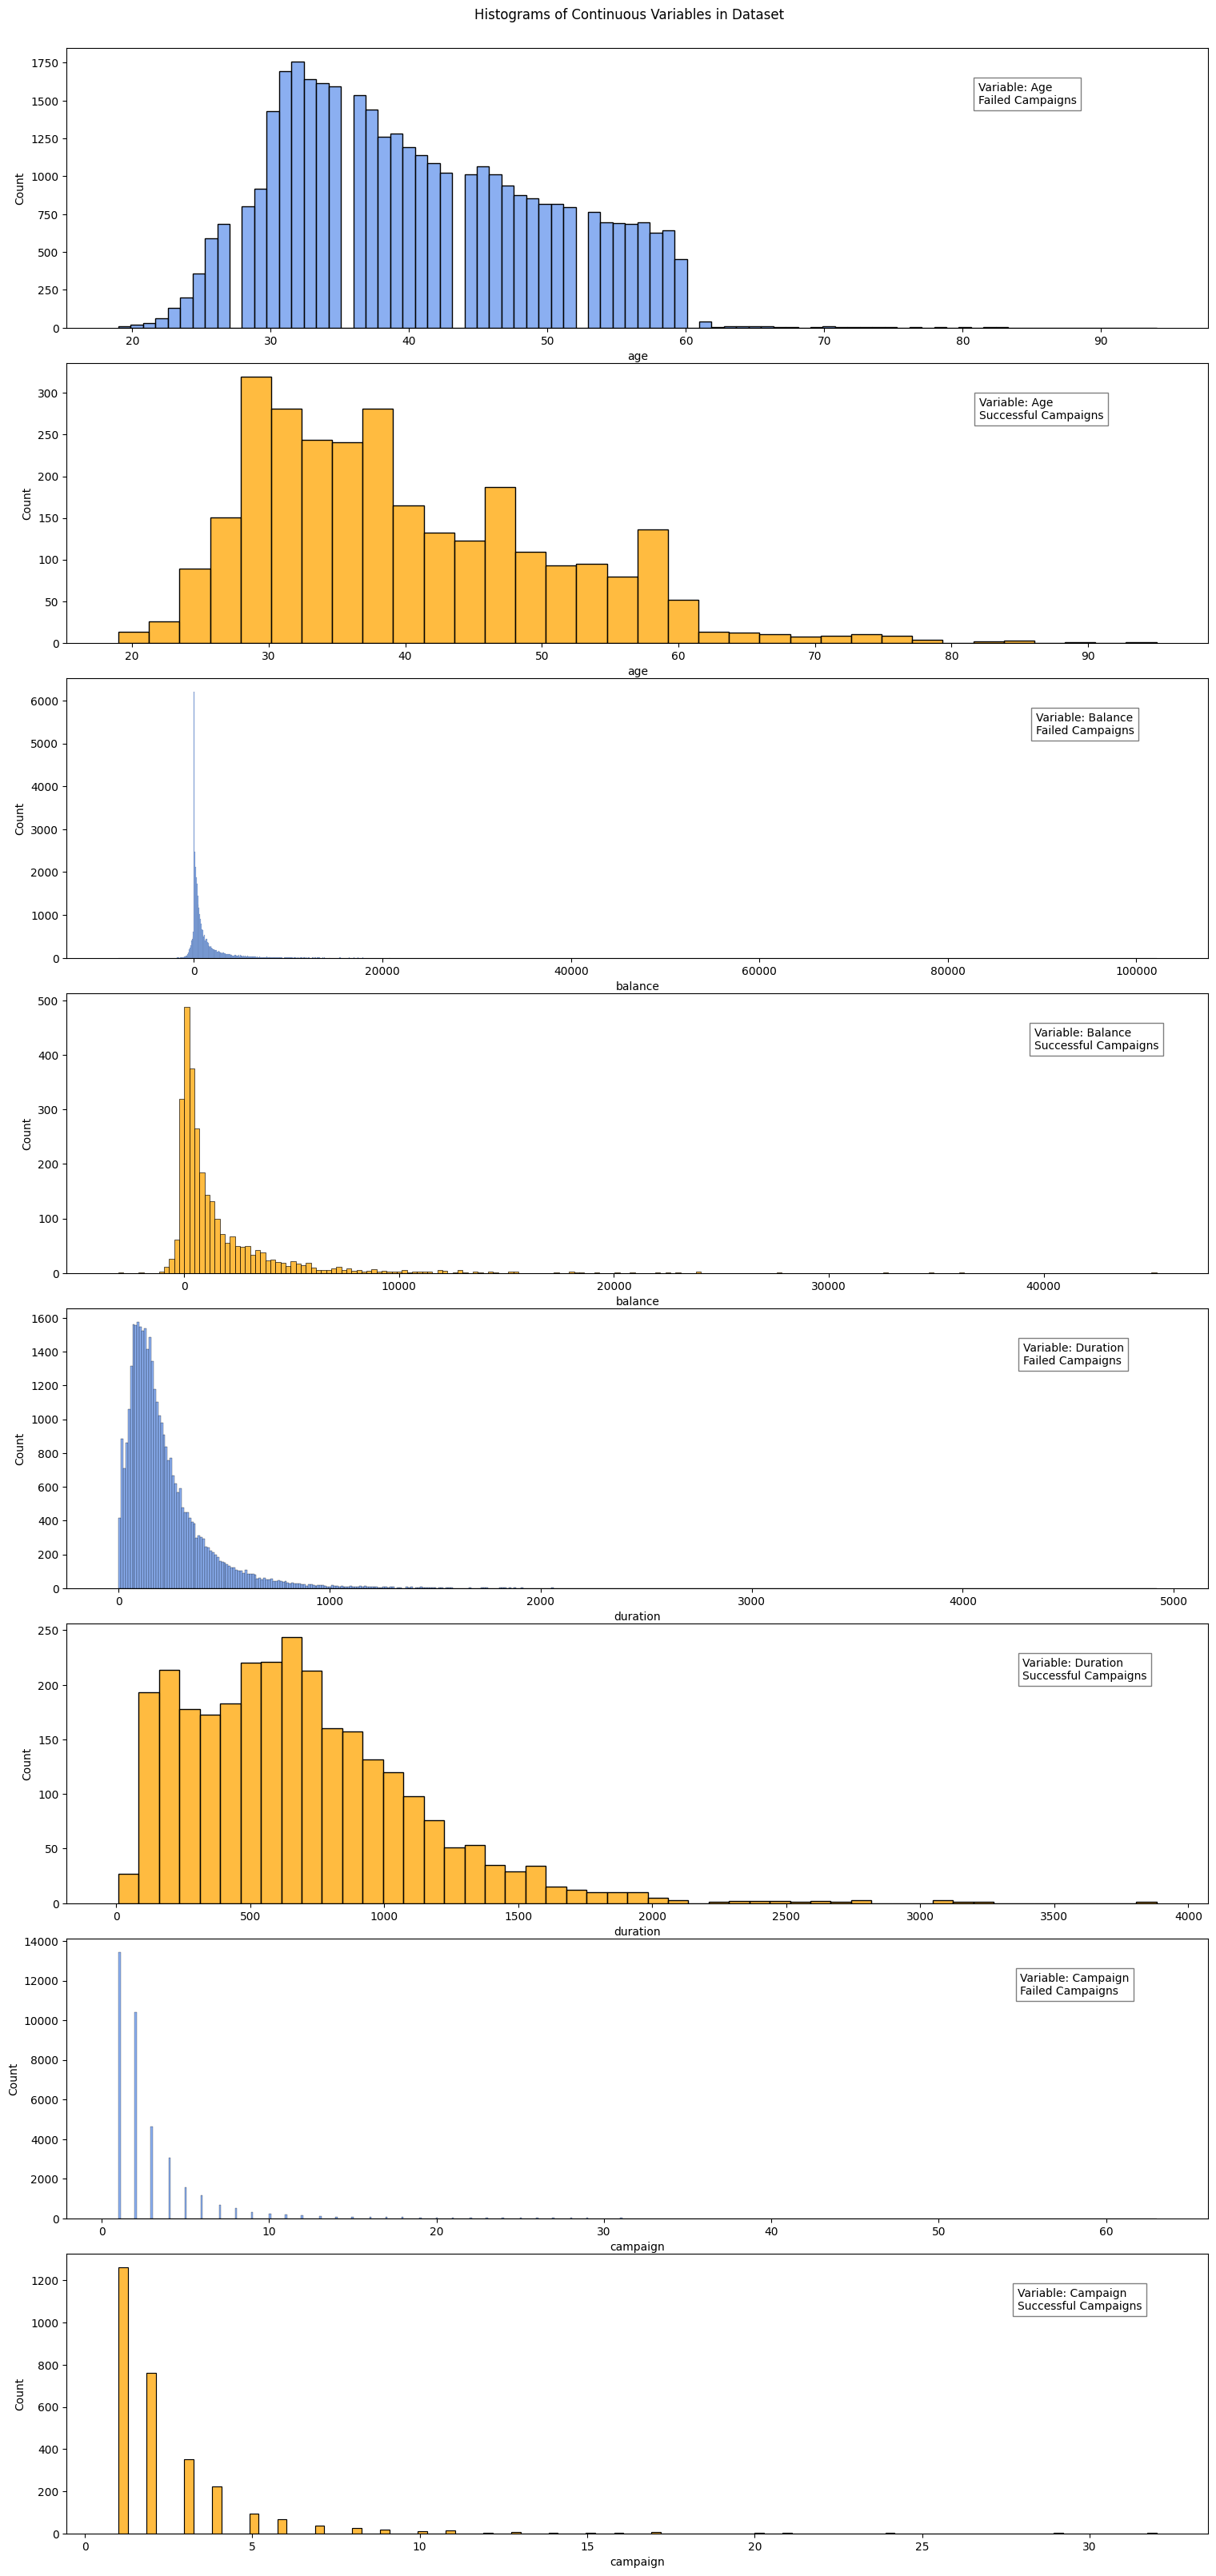

In [ ]:
# get total number of plots
num_plots=len(num_nunique)*2

# create subplots
fig,axes=plt.subplots(num_plots,1,figsize=(15,num_plots*4))
plt.suptitle(t='Histograms of Continuous Variables in Dataset',y=.999)
plt.tight_layout()

# flatten axes for easy indexing
axes=axes.flatten()

# plot each column
for i, (col, order) in enumerate(num_nunique.items()):
#     plot 'no' part
    ax1=sns.histplot(data=df_no,x=col,color='cornflowerblue',ax=axes[i*2])
    ax1.text(ax1.get_xlim()[1]+(ax1.get_xlim()[1])*(-0.17),
             ax1.get_ylim()[1] - (ax1.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nFailed Campaigns', bbox=dict(facecolor='white', alpha=0.5))

    # Plot 'yes' part
    ax2 = sns.histplot(data=df_yes,x=col,color='orange',ax=axes[i*2 + 1])
    ax2.text(ax2.get_xlim()[1]+(ax2.get_xlim()[1])*(-0.17),
             ax2.get_ylim()[1] - (ax2.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nSuccessful Campaigns', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('../figs/2_histograms.pdf')
plt.savefig('../figs/2_histograms.png')

The patterns between successful and failed campaigns' continuous data are mostly similar, although the X and Y axes are different. The one feature that I see is different is the distribution for duration for successful campaigns is wider than those for failed campaigns. Boxplots may clear this up for us.

#### Figure 3: Boxplots of Continuous Features <a name='fig3'></a>

In [ ]:
order

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

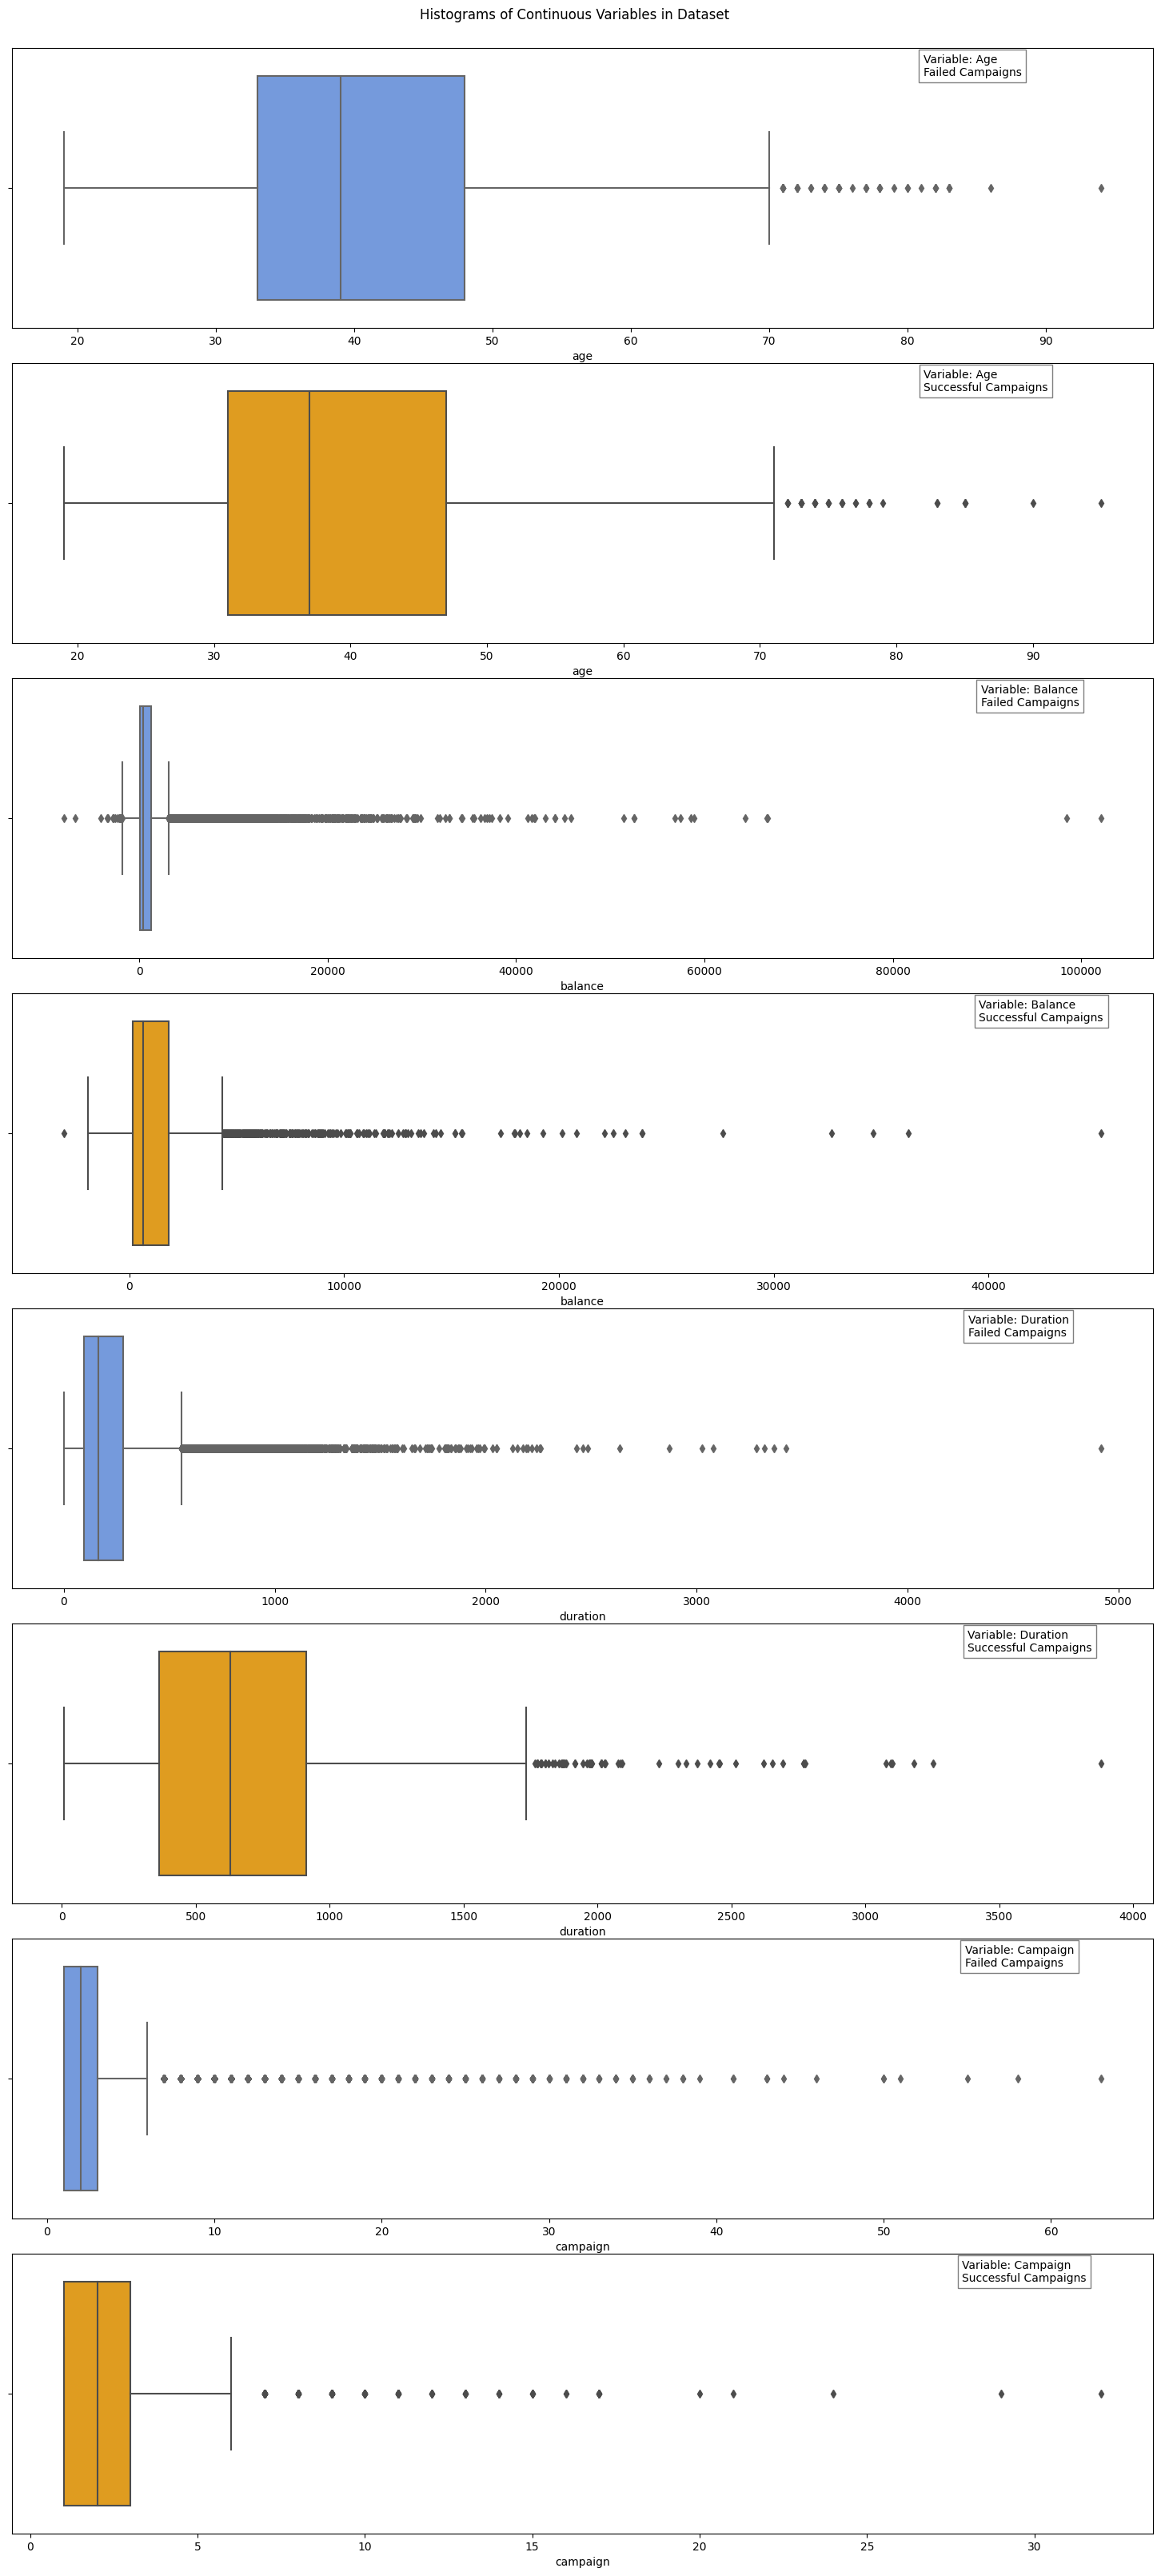

In [ ]:
# get total number of plots
num_plots=len(num_nunique)*2

# create subplots
fig,axes=plt.subplots(num_plots,1,figsize=(15,num_plots*4))
plt.suptitle(t='Histograms of Continuous Variables in Dataset',y=.999)
plt.tight_layout()

# flatten axes for easy indexing
axes=axes.flatten()

# plot each column
for i, (col, order) in enumerate(num_nunique.items()):
#     plot 'no' part
    ax1=sns.boxplot(data=df_no,x=col,color='cornflowerblue',ax=axes[i*2])
    ax1.text(ax1.get_xlim()[1]+(ax1.get_xlim()[1])*(-0.17),
             ax1.get_ylim()[1] - (ax1.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nFailed Campaigns', bbox=dict(facecolor='white', alpha=0.5))

    # Plot 'yes' part
    ax2 = sns.boxplot(data=df_yes,x=col,color='orange',ax=axes[i*2 + 1])
    ax2.text(ax2.get_xlim()[1]+(ax2.get_xlim()[1])*(-0.17),
             ax2.get_ylim()[1] - (ax2.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nSuccessful Campaigns', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('../figs/2_boxplots.pdf')
plt.savefig('../figs/2_boxplots.png')

Duration does indeed seem different, though recall that this feature is describing how long the last phone call was with the customer. It may not tell us that much.

#### Figure 4: Correlation Matrix of Continuous Features <a name='fig4'></a>

In [ ]:
df_num=df[['age','balance','duration','campaign']]

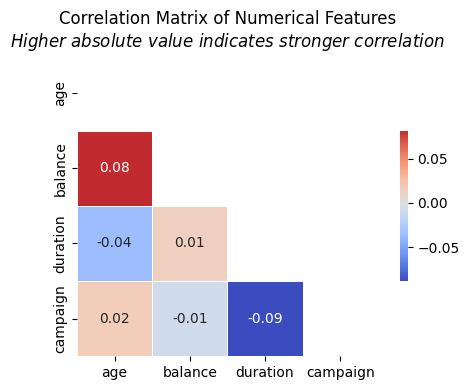

In [ ]:
# compute correlation matrix
corr=df_num[['age','balance','duration','campaign']].corr()

# generate mask for the upper triangle
mask=np.triu(np.ones_like(corr, dtype=bool))

# set up matplotlib figure
f,ax = plt.subplots(figsize=(5, 4))

# draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap='coolwarm',#vmax=1,vmin=-1,
            center=0,
            square=True,linewidths=.5,annot=True,
            fmt='.2f',cbar_kws={"shrink":.5})
plt.title('Correlation Matrix of Numerical Features\n$Higher$ $absolute$ $value$ $indicates$ $stronger$ $correlation$')
plt.tight_layout()

# save fig
plt.savefig('../figs/2_corrmatrix_num.pdf')
plt.savefig('../figs/2_corrmatrix_num.png')

It's good to see that there are no strong correlations with the numerical data. `age`:`balance` makes sense because as you age, you will have had a longer time to accrue more money.

Let's now look at the categorical data now:

#### Figure 5: Correlation Matrix of Categorical Features <a name='fig5'></a>

In [ ]:
# make a df of just the categorical values
df_cat=df[['job','marital','education','default','housing','loan','contact','day','month','y']]

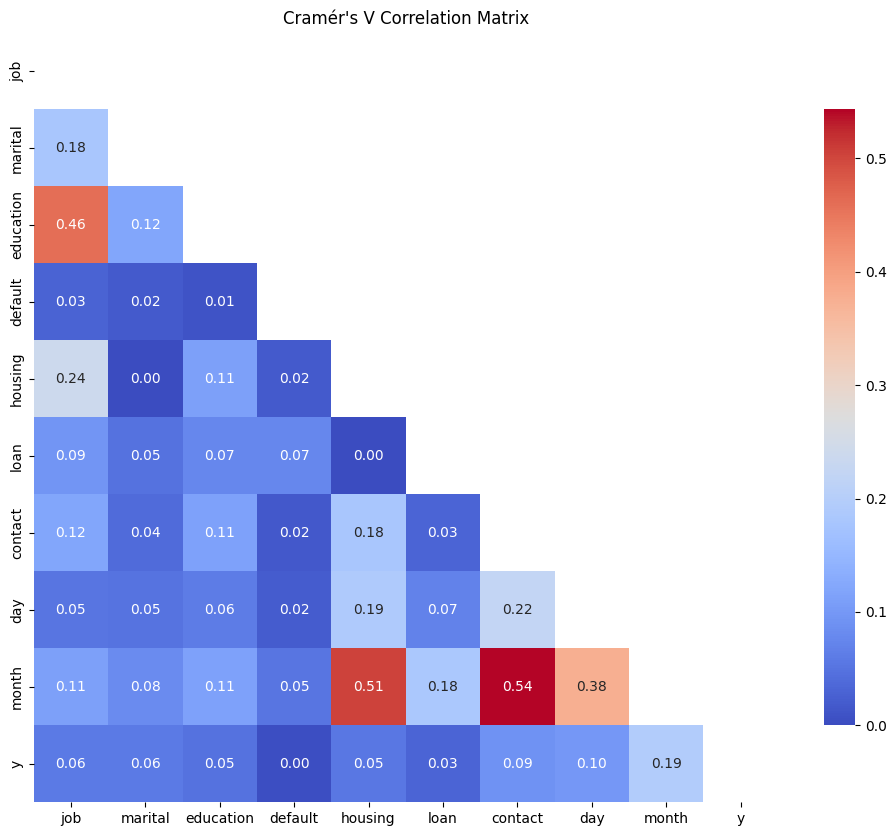

In [ ]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def cramers_v_matrix(df):
    """Compute a matrix of Cramér's V statistics for all pairs of categorical columns in a DataFrame."""
    cols = df.columns
    n = len(cols)
    cv_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cv_matrix[i, j] = cramers_v(df[cols[i]], df[cols[j]])
    return pd.DataFrame(cv_matrix, index=cols, columns=cols)

# Compute Cramér's V matrix
cv_matrix = cramers_v_matrix(df_cat)

# generate mask for the upper triangle
mask = np.triu(np.ones_like(cv_matrix, dtype=bool))

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cv_matrix, annot=True, cmap='coolwarm', #vmin=-1, vmax=1,
            mask=mask, cbar_kws={"shrink": .8},fmt='.2f')

plt.title("Cramér's V Correlation Matrix")

# save fig
plt.savefig('../figs/2_corrmatrix_categorical.pdf')
plt.savefig('../figs/2_corrmatrix_categorical.png')

plt.show()

This is a great figure. Most correlations are very slight, but there are a few stronger correlations, like `contact`:`month`, `housing`:`month`, `job`:`education`, and `day`:`month`. These correlations mostly make sense.

#### What about Scatterplots? <a name='scat'></a>

Scatterplots do not seem to give us much insight. The data points are very dispersed and a pattern does not readily emerge:

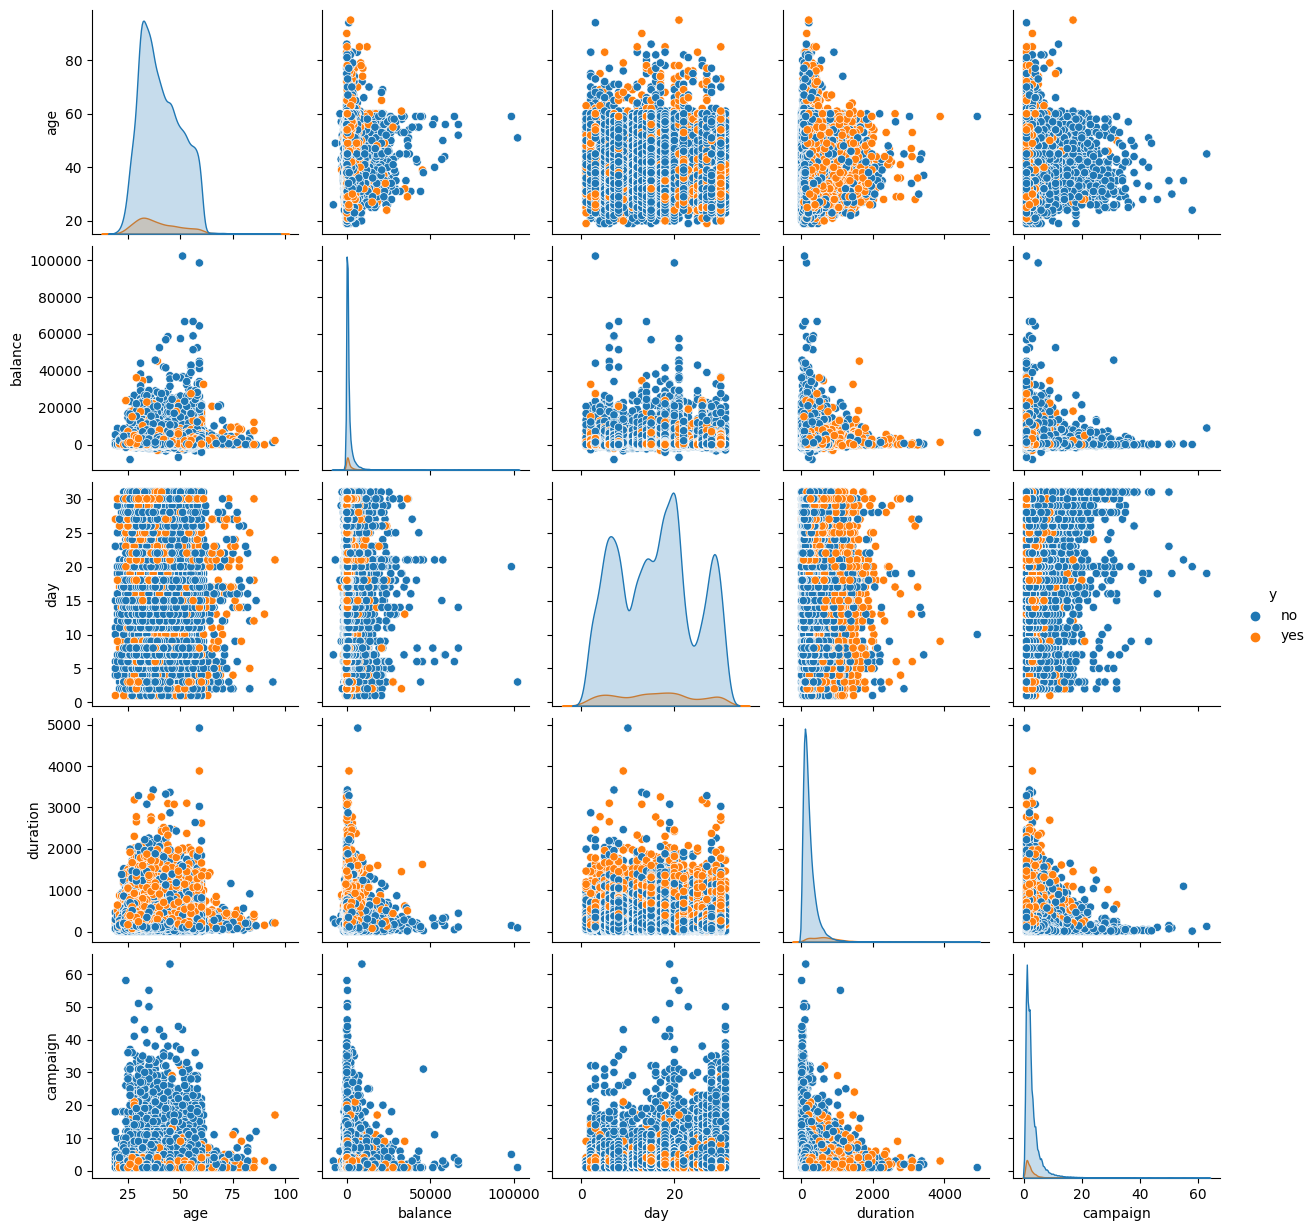

In [ ]:
sns.pairplot(data=df,hue='y')

plt.savefig('../figs/2_pairplot.pdf')
plt.savefig('../figs/2_pairplot.png')

In [ ]:
# reinstate warning labels
import warnings
warnings.filterwarnings("default", module="seaborn")

## Modeling <a name='mod'></a>

### Goals recap

To achieve this project's goals, we have to run models. As a reminder, this project is aiming to predict customer behavior. Specifically, we are training models to determine if a customer will buy a term deposit loan.

We are aiming to achieve ≥81% accuracy with the modeling
  * Use a 5-fold cross validation strategy and take the average performance score.

Bonus goals include:
* Determine which customers are most likely to buy the term deposit loan
  * Which segments of customers should the client prioritize?
* Determine what makes the customer buy the loan
  * Which feature should the startup focus on?

### PyCaret

[PyCaret](#https://pycaret.gitbook.io/docs) is a library that helps make it easy to experiment on the performance of different ML algorithms so that we can maximize our time on optimizing the best algorithm.

Classification using the OOP syntax, building on the example from [pycaret.gitbook.io](#pycaret.gitbook.io):

The results of PyCaret show that Gradient Boosting Classifier gave the best accuracy, at almost 94%!

In [ ]:
clf1 = setup(df,
             target = 'y',
             session_id=seed,
             log_experiment=True,
             experiment_name='clf1')

In [ ]:
# save setup results
setup_results=pull()
# print(setup_results)
# setup_results.to_csv('../joblib/2_pycaret_setupresults.csv')
from google.colab import files
setup_results.to_csv('2_pycaret_setupresults.csv',encoding='utf-8-sig')
files.download('2_pycaret_setupresults.csv')

In [ ]:
best_model=compare_models(fold=5)

# save setup results
# best_model.to_csv('../joblib/2_pycaret_bestmodel.csv')
best_model=pull()
best_model.to_csv('2_pycaret_bestmodel.csv',encoding='utf-8-sig')
files.download('2_pycaret_bestmodel.csv')

In [ ]:
gbc_model=create_model('gbc')

# save gbc_model
# gbc_model.pull()
# gbc_model.to_csv('../joblib/2_pycaret_gbcmodel.csv')
# gbc_model.to_csv('2_pycaret_gbcmodel.csv',encoding='utf-8-sig')
# files.download('2_pycaret_gbcmodel.csv')

In [ ]:
feature_importances=plot_model(gbc_model,plot='feature',save=True)
feature_importances=plot_model(gbc_model,plot='feature')
# save feature_importances
# feature_importances.pull()
# feature_importances.to_csv('2_pycaret_featureimportances.csv',encoding='utf-8-sig')
# files.download('2_pycaret_featureimportances.csv')

We see that according to PyCaret, `duration` has the strongest importance on predicting campaign success.

In [ ]:
evaluate_model(gbc_model)

In [ ]:
# plot AUC
plot_model(gbc_model, plot = 'auc')

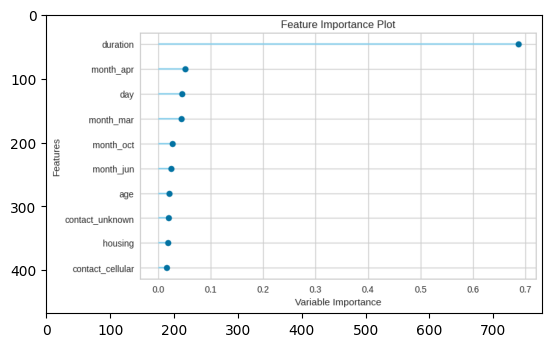

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../figs/2_pycaret_featureimportance.png')
imgplot = plt.imshow(img)
plt.show()

The AUC-ROC curve is looking pretty healthy: an AUC of over 90% is great. As this is just the base model, let's move to a more rigorous modeling strategy to help us answer this project's questions.

The results of the PyCaret experimentation show that the Gradient Boosting Classifier algorithm is best suited for the data. Let's use that for our modeling efforts.

### Will a Customer Receive a Loan?
`AutoSklearn` to  `Optuna` to `scikit-learn`: the Modeling Workflow

I will first use [`AutoSklearn`](#https://automl.github.io/auto-sklearn/master/#) to help me explore the ML algorithm landscape to identify the best-performing models for this particular dataset.

In order to find the best hyperparameters for our modeling, I will use [`Optuna`](#https://optuna.readthedocs.io/en/stable/index.html). This is similar to other frameworks like [`Hyperopt`](#http://hyperopt.github.io/hyperopt/), which are designed to quickly and efficiently find the best hyperparameters for your dataset.

Finally, we will use `sklearn` to build the final, optimized model.

#### Notes on project setup:

We want to help the bank understand which customers are most likely to purchase the financial product. Knowing this would save the bank time and money. The dataset that we were given consists of demographic (and banking) data (like `age`,`job`,`marital`,and `balance`) as well as campaign-specific information (like `contact`,`day`,and `duration`).

*Demographic and Banking Data*
* `age`
* `job`
* `marital`
* `education`
* `default`
* `balance`
* `housing`
* `loan`

*Campaign-Specific Data*
* `contact`
* `day`
* `month`
* `duration`
* `campaign`

*Target Feature*
* `y`

We want to build a three-layered ML system that helps answer the project goals:
1. Understand which kinds of customers that they should call
 1. I will **not** give the model access to the campaign call data
1. After the initial calls, understand which customers the company should keep calling
 1. Give the model access to the campaign call data
1. Build a model using unsupervised learning to learn about clusters of customers in the dataset

**Layer 1**:  

Use `X_1` to model which customers to make calls to. We are training a model that does not know any call data, so this is *before* making calls.

**Layer 2**:  

Use the full `X` dataset (for clarity in its use in the layer flow, we'll be using `X_2` to model which customers the company should keep calling.

**Layer 3**:  

Use unsupervised learning to uncover how the customers are grouped.

#### Setup X

In [46]:
dbd=[ # demographic and banking data
    'age',
    'job',
    'marital',
    'education',
    'default',
    'balance',
    'housing',
    'loan'
]

csd=[ # campaign-specific data
    'contact',
    'day',
    'month',
    'duration',
    'campaign'
]

In [47]:
df=pd.read_csv('../data/2_data.csv')

`_1` refers to the first layer of the model, consisting of demographic and banking data, not including data related to the campaign. This simulates new customers that haven't received a call yet. This helps answer the main question of the project, namely to train a model that predicts which customer will receive a loan.

In [48]:
X_1=df[[col for col in df.columns if col != 'y' and col not in csd]]
y=df['y']

`_2` refers to the second layer of the model, consisting of all columns. This helps answer the first bonus question of the project, which is to determine which customers the bank should prioritize calling to: those most likely to receive a loan.

In [49]:
X_2=df[[col for col in df.columns if col != 'y']]

`_3` refers to the third layer of the model, consisting of all columns. This helps answer the another bonus question: can we train an unsuperived learning model that groups the customers into categories?

In [15]:
X_3=df[[col for col in df.columns if col != 'y']]

In [7]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign    y  
0       unknown    5   may       261         1   no  
1       unknown    5   may       151         1   no  
2       unknown    5   may        76         1   no  
3       unknown    5   may        92         1   no  
4       unknown    5   may       198         1   no  
...         ...  ...   ...       ...       ...  ...  
39995  cellular    3   jun       107         1   no  
39996  cellular    3   jun       238         3  yes  
39997  cellular    3   jun       170         1  yes  
39998  cellular    3   jun       342         1   no  
39999  cellular    3   jun       113         1   no  

[40000 rows x 14 columns]

Make function to automate the training of the AutoSklearn pipeline:

In [8]:
def detectCatCont(X,verbose=False):
    '''
    Helper function for detecting categorical and continuous
    features in a dataset. It returns the categorical and
    continuous features as a tuple.
    '''

    # detect categorical and continuous features
    categorical_features = X.select_dtypes(
        include=['object', 'category']).columns.tolist()
    continuous_features = X.select_dtypes(
        include=['int64', 'float64']).columns.tolist()

    if verbose:
        print('Categorical and continuous features detected')

    return categorical_features,continuous_features

In [9]:
def defPreprocessor(categorical_features,continuous_features,verbose=False,custom_preprocessor=None):
    '''
    Helper function for returning a custom preprocessor for
    processing a dataframe, or one that is defined
    within the function. It returns the custom or
    function-created preprocessor.
    '''

    if custom_preprocessor is not None:
        if verbose:
            print('Using custom preprocessor')
        return custom_preprocessor

    # Define the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features),
            ('num', StandardScaler(), continuous_features)
        ]
    )

    if verbose:
        print('Preprocessor created')
        print('categorical_features:', categorical_features)
        print('continuous_features:', continuous_features)

    return preprocessor

In [10]:
def trainTestSplits(X,y,test_size,seed,verbose=False):
    '''
    Helper function that automates the train_test_split function within scikit-learn
    and returns them as a dictionary.
    '''

    # create train/test splits
    X_train, X_test, y_train, y_test = train_test_split\
    (X, y, test_size=test_size, random_state=seed,stratify=y)

    if verbose:
        print('Training and testing splits created')

    splits={
        'X_train':X_train,
        'X_test':X_test,
        'y_train':y_train,
        'y_test':y_test
        }

    return splits

In [11]:
def defPipeline(time_for_task,seed,preprocessor,verbose=False):
    '''
    Helper function that creates the pipeline from a previously-defined
    preprocessor. Returns the pipeline.
    '''

    # Define Auto-sklearn classifier and pipeline
    automl = AutoSklearnClassifier(
        time_left_for_this_task=time_for_task,
        seed=seed
    )
    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('classifier', automl)
        ]
    )

    if verbose:
        print('AutoSklearnClassifier and pipeline created')

    return pipeline

In [12]:
def evaluateModel(X_test,y_test,pipeline,verbose=False):
    '''
    Helper function that returns a tuple of predictions on
    the model and the accuracy.
    '''

    # evaluate the model
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if verbose:
        print(f"AutoSklearn accuracy:\n{accuracy*100:.2f}%")

    return y_pred,accuracy

In [13]:
def returnTopModels(pipe_path,score=0.9):
    '''
    Returns the most common classifiers achieving a mean_test_score of over 90% accuracy.
    This value can be changed in the function.
    '''

    # load pipeline and splits
    pipeline=joblib.load(pipe_path)

    # access the AutoSklearnClassifier from the pipeline
    automl_model = pipeline.named_steps['classifier']

    # access the cross-validation results
    cv_results=pd.DataFrame(automl_model.cv_results_)

    cv_results_=\
        cv_results[
            (cv_results['status'] == 'Success') & \
            (cv_results['mean_test_score']>score)
        ]\
    .sort_values(by='mean_test_score', ascending=False)

    cv_results_over90=cv_results_['param_classifier:__choice__'].value_counts()

    return cv_results_over90

In [14]:
def run_autosklearn_pipeline(X,y,seed,test_size,save_location,filename,verbose=False,time_for_task=3600,return_tops=True):
    '''
    Function that runs the AutoSklearnClassifier.
    Outputs a dictionary of the test_train_split'ed dataset ("splits")
    and the created pipeline object.

    It also returns the top-performing models
    that achieve an accuracy of over 90%.

    Arguments:
    X - the features dataset
    y - the target dataset
    seed - the random seed
    test_size - the test_size fraction for train_test_split
    save_location - the location where the splits and pipeline are located
    filename - what to call these two objects
    verbose - verbosity flag
    time_for_task - using the AutoSklearnClassifier default value

    Outputs:
    splits - a dictionary of X_train,X_test,y_train,y_test
    pipeline - the trained AutoSklearnClassifier pipeline
    '''

    categorical_features,continuous_features=detectCatCont(X,verbose)

    preprocessor=defPreprocessor(categorical_features,continuous_features,verbose)

    splits=trainTestSplits(X,y,test_size,seed,verbose)

    X_train=splits['X_train']
    X_test=splits['X_test']
    y_train=splits['y_train']
    y_test=splits['y_test']

    pipeline=defPipeline(time_for_task,seed,preprocessor,verbose)

    # start training
    if verbose:
        print(f"\nTraining the pipeline... (This may take up to {time_for_task//60} minutes)\n")
        print()
    pipeline.fit(X_train, y_train)

    # training complete
    if verbose:
        print("\nTraining complete.")

    y_pred,accuracy=evaluateModel(X_test,y_test,pipeline,verbose)

    pipe_path=f'{save_location+filename}'

    # save pipeline
    joblib.dump(pipeline,pipe_path)

    if verbose:
        print(f'saved pipeline here:\n{pipe_path}')

    splits_path=f'{save_location+filename}_splits'

    # save splits
    joblib.dump(splits,splits_path)

    if verbose:
        print(f'saved splits here:\n{splits_path}')

    if return_tops:
        cv_results_over90=returnTopModels(pipe_path)
        return splits,pipeline,cv_results_over90

    return splits,pipeline

#### Layer 1: Using only the demographic and banking data

##### `AutoSklearn`

In [1]:
seed=6532
seed

6532

Note: I set the seed to a specific number because training the model takes time and I want to proceed with the rest of the project. This number was chosen randomly previously.

In [2]:
test_size=0.2
test_size

0.2

In [ ]:
X_1.head(3)

age           job  marital  education default  balance housing loan
0   58    management  married   tertiary      no     2143     yes   no
1   44    technician   single  secondary      no       29     yes   no
2   33  entrepreneur  married  secondary      no        2     yes  yes

In [ ]:
# run function for layer_1
splits_1,pipeline_1,results_1=\
run_autosklearn_pipeline(X=X_1,
                         y=y,
                         seed=seed,
                         verbose=True,
                         test_size=test_size,
                         save_location='../joblib/',
                         filename='2_pipeline_20240821_layer1',
                         time_for_task=3600)

Categorical and continuous features detected
Preprocessor created
categorical_features: ['job', 'marital', 'education', 'default', 'housing', 'loan']
continuous_features: ['age', 'balance']
Training and testing splits created
AutoSklearnClassifier and pipeline created

Training the pipeline... (This may take up to 60 minutes)


[WARNING] [2024-08-22 03:13:33,051:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2024-08-22 03:13:33,765:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2024-08-22 03:14:17,146:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2024-08-22 03:14:31,188:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2024-08-22 03:20:32,566:Client-EnsembleBuilder] No mo

In [ ]:
# see top-performing models
results_1=returnTopModels('../joblib/2_pipeline_20240821_layer1')
results_1

random_forest          14
passive_aggressive      9
mlp                     5
adaboost                5
bernoulli_nb            4
k_nearest_neighbors     3
extra_trees             2
sgd                     1
liblinear_svc           1
lda                     1
Name: param_classifier:__choice__, dtype: int64

In [2]:
# load objects
pipeline_1=joblib.load('../joblib/2_pipeline_20240821_layer1')
splits_1=joblib.load('../joblib/2_pipeline_20240821_layer1_splits')

/Applications/Anaconda/anaconda3/envs/apziva/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Applications/Anaconda/anaconda3/envs/apziva/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Applications/Anaconda/anaconda3/envs/apziva/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estima

ModuleNotFoundError: No module named 'autosklearn'

In [ ]:
# determine accuracy of model
X_1_test=splits_1['X_test']
y_1_test=splits_1['y_test']

y_1_pred,accuracy_1=evaluateModel(X_test,y_test,pipeline_1,verbose=True)

AutoSklearn accuracy:
92.74%


/tmp/ipykernel_88/2902082143.py:80: RuntimeWarning: invalid value encountered in double_scalars
  f1_score  = 2*precision*recall / (precision + recall)


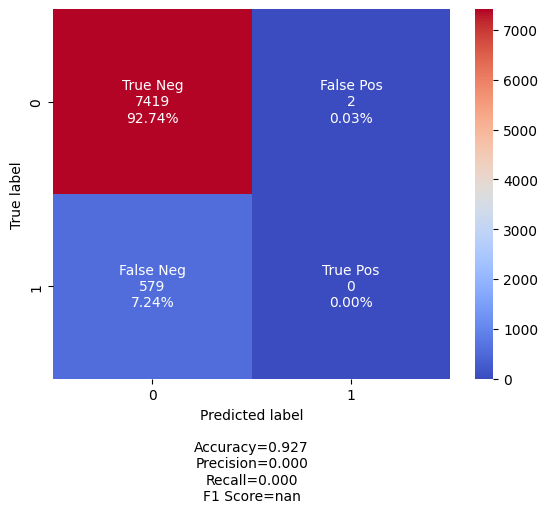

In [ ]:
# view confusion matrix
# the F1-score doesn't show but that's ok
cf_matrix_1=confusion_matrix(y_1_test,y_1_pred)
labels=['True Neg','False Pos','False Neg','True Pos']
make_confusion_matrix(cf=cf_matrix_1,
                      group_names=labels,
                      cmap='coolwarm')

In [ ]:
# view F1-score
creport=classification_report(y_test,y_1_pred)
print(creport)

              precision    recall  f1-score   support

          no       0.93      1.00      0.96      7421
         yes       0.00      0.00      0.00       579

    accuracy                           0.93      8000
   macro avg       0.46      0.50      0.48      8000
weighted avg       0.86      0.93      0.89      8000



This is a great result.

#### Layer 2: Use the full X dataset to model which customers the bank should keep calling

In [ ]:
X_2.head(3)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   

   contact  day month  duration  campaign  
0  unknown    5   may       261         1  
1  unknown    5   may       151         1  
2  unknown    5   may        76         1

In [ ]:
splits_2,pipeline_2,results_2=\
run_autosklearn_pipeline(X=X_2,
                         y=y,
                         seed=seed,
                         verbose=True,
                         test_size=test_size,
                         save_location='../joblib/',
                         filename='2_pipeline_20240821_layer2',
                         time_for_task=3600)

Categorical and continuous features detected
Preprocessor created
categorical_features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
continuous_features: ['age', 'balance', 'day', 'duration', 'campaign']
Training and testing splits created
AutoSklearnClassifier and pipeline created

Training the pipeline... (This may take up to 60 minutes)




In [ ]:
results_2=returnTopModels('../joblib/2_pipeline_20240821_layer2')
results_2

random_forest          23
mlp                     5
liblinear_svc           3
k_nearest_neighbors     2
extra_trees             2
passive_aggressive      1
gaussian_nb             1
bernoulli_nb            1
Name: param_classifier:__choice__, dtype: int64

In [ ]:
pipeline_2=joblib.load('../joblib/2_pipeline_20240821_layer2')
splits_2=joblib.load('../joblib/2_pipeline_20240821_layer2_splits')

In [ ]:
X_2_test=splits_2['X_test']
y_2_test=splits_2['y_test']

y_2_pred,accuracy_2=evaluateModel(X_2_test,y_2_test,pipeline_2,verbose=True)

AutoSklearn accuracy:
93.77%


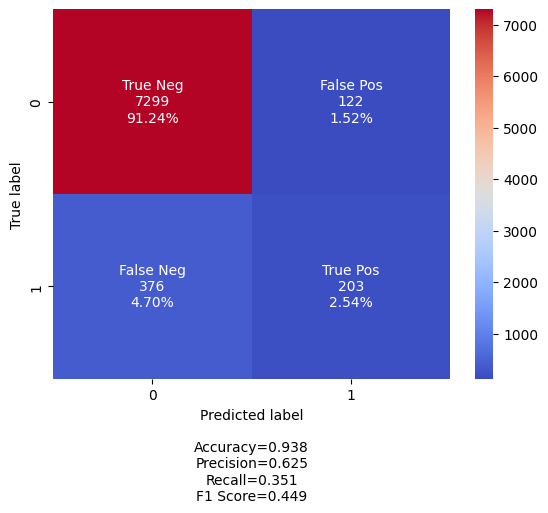

In [ ]:
# view confusion matrix
# the F1-score doesn't show but that's ok
cf_matrix_2=confusion_matrix(y_2_test,y_2_pred)
labels=['True Neg','False Pos','False Neg','True Pos']
make_confusion_matrix(cf=cf_matrix_2,
                      group_names=labels,
                      cmap='coolwarm')

In [ ]:
# view F1-score
creport=classification_report(y_test,y_2_pred)
print(creport)

              precision    recall  f1-score   support

          no       0.95      0.98      0.97      7421
         yes       0.62      0.35      0.45       579

    accuracy                           0.94      8000
   macro avg       0.79      0.67      0.71      8000
weighted avg       0.93      0.94      0.93      8000



This is also a great result.

#### Layers 1 and 2 recap

`random_forest` was the most common algorithm to be used for this dataset. We will use this algorithm for Optuna in the next section.

First, we'll explore possible algorithms for __Layer 3__:

#### Layer 3: Unsupervised learning on customer clustering

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN, MeanShift, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from pandas.api.types import is_string_dtype
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

We will be creating a class object to automatically handle our unsupervised learning algorithm exploration.

In [8]:
class Clusterer:
    def __init__(self, X, y=None, random_state=seed, verbose=True):
        self.X = X
        self.y = y
        self.random_state = random_state
        self.results = {}
        self.verbose = verbose

    def train(self, algorithms):
        # Identify columns that need to be one-hot encoded
        cols_to_transform = [col for col in self.X.columns if is_string_dtype(self.X[col])]
        
        if self.verbose:
            print('Columns to transform:', cols_to_transform)
        
        # One-hot encode categorical columns
        self.X = pd.get_dummies(data=self.X, columns=cols_to_transform)
        
        if self.verbose:
            print('Dummy variables created')
        
        # scale the data
        scaler=StandardScaler()
        self.X=scaler.fit_transform(self.X)
        
        if self.verbose:
            print('Data has been scaled')

        
        # Iterate over each algorithm in the dictionary
        for name, algo_class in algorithms.items():
            # Initialize the clustering algorithm with default parameters
            clu = algo_class(random_state=self.random_state) if 'random_state' in algo_class().get_params() else algo_class()
            
            # Fit the model and get labels
            labels = clu.fit_predict(self.X)

            # Evaluate the model (Silhouette score requires labels and at least 2 clusters)
            score = silhouette_score(self.X, labels) if len(set(labels)) > 1 else -1

            # Store the result
            self.results[name] = {
                'model': clu,
                'score': score,
                'labels': labels  # Save the labels for evaluation
            }

            if self.verbose:
                print(f"Trained {name} with score: {score}")

        if self.verbose:
            print('Results:', self.results)

    def compare_models(self):
        # Compare models based on their Silhouette scores
        for model_key, result in self.results.items():
            print(f"{model_key}: Silhouette Score = {result['score']}")

        # Compare models to the ground truth if 'y' is provided
        if self.y is not None:
            print("\nEvaluating models against ground truth:")
            for model_key, result in self.results.items():
                labels = result['labels']
                if len(set(labels)) > 1:  # Ensure the model has more than 1 cluster
                    ari_score = adjusted_rand_score(self.y, labels)
                    nmi_score = normalized_mutual_info_score(self.y, labels)
                    print(f"{model_key}: Adjusted Rand Index (ARI) = {ari_score}, Normalized Mutual Information (NMI) = {nmi_score}")
                else:
                    print(f"{model_key}: Only one cluster found; ARI and NMI scores not computed.")

        # Identify the best model based on Silhouette Score
        best_model_key = max(self.results, key=lambda k: self.results[k]['score'])
        best_model = self.results[best_model_key]['model']
        best_score = self.results[best_model_key]['score']

        print(f"\nBest model based on Silhouette Score: {best_model_key} with Silhouette Score = {best_score}")
        return best_model_key, best_model, best_score

In [9]:
algorithms = {
    'kmeans': KMeans,
    'agg': AgglomerativeClustering,
    'dbscan': DBSCAN,
    'hdbscan': HDBSCAN,
    'meanshift': MeanShift,
    'spectral': SpectralClustering
}

In [11]:
algorithms = {
    'kmeans': KMeans,
    'agg': AgglomerativeClustering,
    'dbscan': DBSCAN,
    'hdbscan': HDBSCAN,
    # 'meanshift': MeanShift,
    # 'spectral': SpectralClustering
}

In [12]:
clusterer = Clusterer(X_3,random_state=seed)
clusterer.train(algorithms)
clusterer.compare_models()

Columns to transform: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
Dummy variables created
Data has been scaled
Trained kmeans with score: 0.08345668835949505
Trained agg with score: 0.3481804484620455
Trained dbscan with score: -0.4331711474833998
Trained hdbscan with score: 0.2845737702740699
Results: {'kmeans': {'model': KMeans(random_state=6532), 'score': 0.08345668835949505, 'labels': array([7, 7, 7, ..., 5, 2, 5], dtype=int32)}, 'agg': {'model': AgglomerativeClustering(), 'score': 0.3481804484620455, 'labels': array([0, 0, 0, ..., 0, 0, 0])}, 'dbscan': {'model': DBSCAN(), 'score': -0.4331711474833998, 'labels': array([-1, -1, -1, ..., -1, -1, -1])}, 'hdbscan': {'model': HDBSCAN(), 'score': 0.2845737702740699, 'labels': array([1180, 1146,  339, ...,   -1, 1033, 1083])}}
kmeans: Silhouette Score = 0.08345668835949505
agg: Silhouette Score = 0.3481804484620455
dbscan: Silhouette Score = -0.4331711474833998
hdbscan: Silhouette Score = 0.2845737702

('agg', AgglomerativeClustering(), 0.3481804484620455)

##### Testing individual clustering algorithms

Testing out MeanShift Algorithm, without using the Clusterer class

In [22]:
X_3.head(3)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   

   contact  day month  duration  campaign  
0  unknown    5   may       261         1  
1  unknown    5   may       151         1  
2  unknown    5   may        76         1

In [17]:
cols_to_transform=[col for col in X_3.columns if is_string_dtype(X_3[col])]
cols_to_transform

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [18]:
X_3_dummies=pd.get_dummies(data=X_3, 
                           columns=cols_to_transform)

bool_cols=[col for col in X_3_dummies.columns if '_' in col]

bool_cols

['job_admin',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct']

In [19]:
X_3_dummies[bool_cols]=X_3_dummies[bool_cols].astype(int)

X_3_dummies.head()

age  balance  day  duration  campaign  job_admin  job_blue-collar  \
0   58     2143    5       261         1          0                0   
1   44       29    5       151         1          0                0   
2   33        2    5        76         1          0                0   
3   47     1506    5        92         1          0                1   
4   33        1    5       198         1          0                0   

   job_entrepreneur  job_housemaid  job_management  ...  month_aug  month_dec  \
0                 0              0               1  ...          0          0   
1                 0              0               0  ...          0          0   
2                 1              0               0  ...          0          0   
3                 0              0               0  ...          0          0   
4                 0              0               0  ...          0          0   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0          0          0          0          0          0          1   
1          0          0          0          0          0          1   
2          0          0          0          0          0          1   
3          0          0          0          0          0          1   
4          0          0          0          0          0          1   

   month_nov  month_oct  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 44 columns]

In [26]:
from sklearn.cluster import estimate_bandwidth

In [27]:
bandwidth=estimate_bandwidth(X_3_dummies,
                             quantile=0.5,
                             n_samples=10000)
print(bandwidth)

1473.6307725847014


In [28]:
ms=MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X_3_dummies)
labels=ms.labels_
cluster_centers=ms.cluster_centers_
cluster_labels=np.unique(labels)
n_clusters=len(cluster_labels)
n_clusters

18

In [29]:
X_3_dummies.head()

age  balance  day  duration  campaign  job_admin  job_blue-collar  \
0   58     2143    5       261         1          0                0   
1   44       29    5       151         1          0                0   
2   33        2    5        76         1          0                0   
3   47     1506    5        92         1          0                1   
4   33        1    5       198         1          0                0   

   job_entrepreneur  job_housemaid  job_management  ...  month_aug  month_dec  \
0                 0              0               1  ...          0          0   
1                 0              0               0  ...          0          0   
2                 1              0               0  ...          0          0   
3                 0              0               0  ...          0          0   
4                 0              0               0  ...          0          0   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0          0          0          0          0          0          1   
1          0          0          0          0          0          1   
2          0          0          0          0          0          1   
3          0          0          0          0          0          1   
4          0          0          0          0          0          1   

   month_nov  month_oct  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 44 columns]

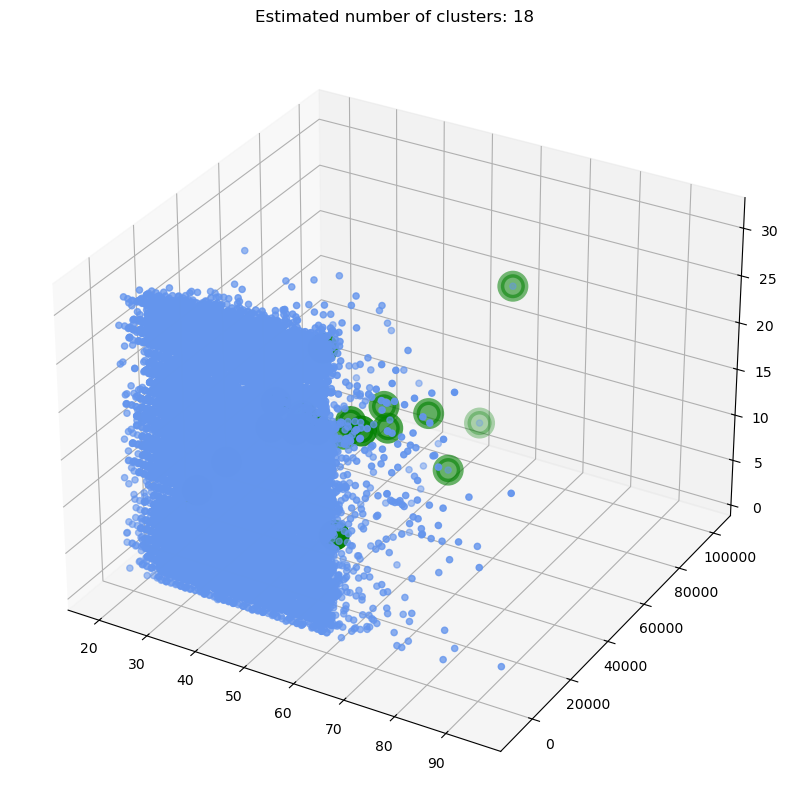

In [33]:
ms_fig = plt.figure(figsize=(12, 10))
ax = ms_fig.add_subplot(111, projection='3d')

# Plot first three columns of X_3_dummies (adjust this based on your needs)
ax.scatter(X_3_dummies.iloc[:, 0],
           X_3_dummies.iloc[:, 1],
           X_3_dummies.iloc[:, 2],
           marker='o',
           color='cornflowerblue')

# Plot first three columns of cluster centers
ax.scatter(cluster_centers[:, 0],
           cluster_centers[:, 1],
           cluster_centers[:, 2],
           marker='o',
           color='green',
           s=300,
           linewidth=5,
           zorder=20)

plt.title(f'Estimated number of clusters: {n_clusters}')
plt.show()

# Read more at: 
# https://analyticsindiamag.com/ai-mysteries/hands-on-tutorial-on-mean-shift-clustering-algorithm/

That is very unclear. Let's try to eliminate the dimensionality before plotting again.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
X_3_dummies.sample()

/Applications/Anaconda/anaconda3/envs/apziva/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


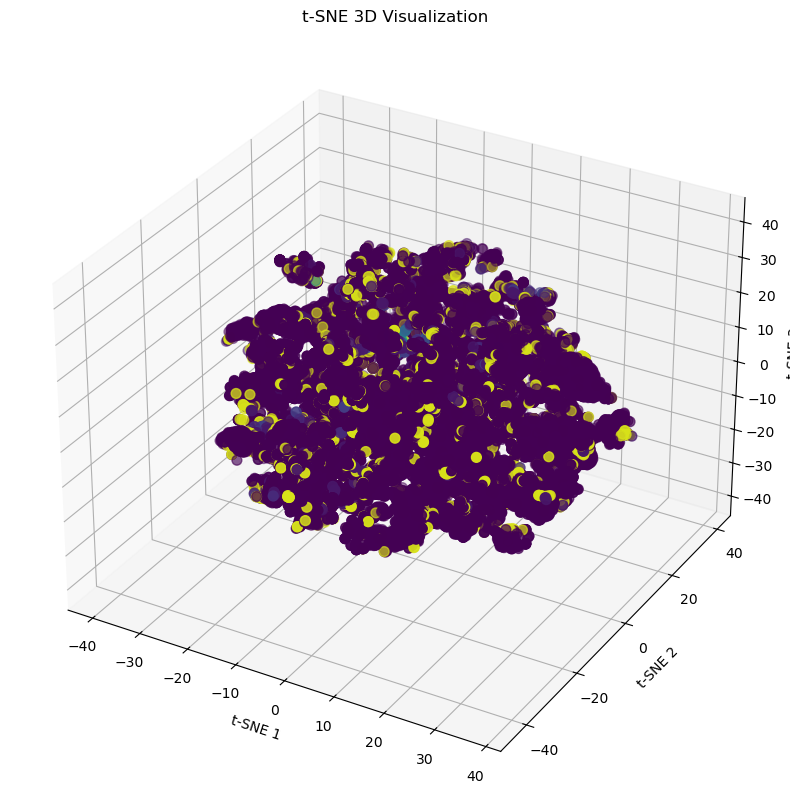

In [37]:
# first need to scale the data
scaler=StandardScaler()
X_3_sample_scaled=scaler.fit_transform(X_3_dummies.sample(frac=.1))

# initialize t-SNE for 3D viz
tsne_3d=TSNE(n_components=3,perplexity=50,max_iter=1000,random_state=seed)

# fit transform the data into 3d space
X3_tsne_3d=tsne_3d.fit_transform(X_3_scaled)

# visualize
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X3_tsne_3d[:,0],
           X3_tsne_3d[:,1],
           X3_tsne_3d[:,2],
           c=labels,
           cmap='viridis',
           marker='o',
           s=50)
ax.set_title('t-SNE 3D Visualization')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.show()

Size of sampled dataset: 4000 rows
Number of clusters: 10, Silhouette Score: 0.0880353434273195
Number of clusters: 60, Silhouette Score: 0.14487218799752272
Number of clusters: 110, Silhouette Score: 0.18196319187319293
Number of clusters: 160, Silhouette Score: 0.18864242475902582
Number of clusters: 210, Silhouette Score: 0.19675279923548875
Number of clusters: 260, Silhouette Score: 0.21009604577885943
Number of clusters: 310, Silhouette Score: 0.22116416956698862
Number of clusters: 360, Silhouette Score: 0.22263540414327082
Number of clusters: 410, Silhouette Score: 0.22977328396233632
Number of clusters: 460, Silhouette Score: 0.2377007638906514
Number of clusters: 510, Silhouette Score: 0.23986057123460314
Number of clusters: 560, Silhouette Score: 0.24394036258560706
Number of clusters: 610, Silhouette Score: 0.2521103292322177
Number of clusters: 660, Silhouette Score: 0.2570183004528231
Number of clusters: 710, Silhouette Score: 0.2604309898335215
Number of clusters: 760, Si

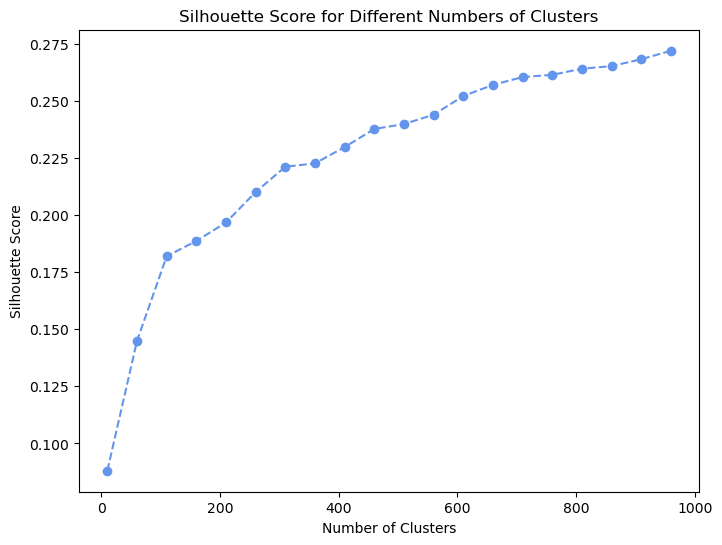

In [32]:
from sklearn.preprocessing import MinMaxScaler

mmscaler=MinMaxScaler()
scaler=StandardScaler()

data=X_3_dummies.sample(frac=.1)

X_3_sample_scaled=scaler.fit_transform(data)

print(f'Size of sampled dataset: {data.shape[0]} rows')

silhouette_scores=[]

range_=range(10,1001,50)

# test different number of clusters
for n_clusters in range_:
#     initialize kmeans
    kmeans=KMeans(n_clusters=n_clusters,random_state=seed)

#     fit KMeans to the data
    kmeans.fit(X_3_sample_scaled)

#     get cluster labels
    cluster_labels=kmeans.labels_
    
#     calculate the silhouette score
    score=silhouette_score(X_3_sample_scaled,cluster_labels)
    
#     append the score to the list
    silhouette_scores.append(score)
    
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score}')
    
# plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_, silhouette_scores, marker='o', linestyle='--', color='cornflowerblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

Best n_cluster=18

In [49]:
# Initialize KMeans with the number of clusters you expect
n_clusters = 18  # Adjust this based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=seed)

# Fit KMeans to the scaled data
kmeans.fit(X_3_sample_scaled)

# Get the cluster labels (which cluster each sample belongs to)
kmeans_labels = kmeans.labels_

In [50]:
# Initialize t-SNE with 3 components for 3D visualization
tsne = TSNE(n_components=3, perplexity=30, max_iter=1000, random_state=seed)

# Fit t-SNE to the scaled data
X_tsne_3d = tsne.fit_transform(X_3_sample_scaled)

In [52]:
plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on KMeans clusters
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=kmeans_labels, cmap='viridis', s=50, marker='o')
ax.set_title('t-SNE 3D Visualization Colored by KMeans Clusters')
# ax.set_colorbar(label='KMeans Cluster Labels')
# ax.set_xlabel('t-SNE 1')
# ax.set_ylabel('t-SNE 2')
# ax.set_zlabel('t-SNE 3')
plt.show()

<Figure size 800x600 with 0 Axes>

In [40]:
from sklearn.cluster import MeanShift

# Initialize and fit MeanShift
ms = MeanShift(bandwidth=estimate_bandwidth(X_3_sample_scaled, quantile=0.2, n_samples=1000))
ms.fit(X_3_sample_scaled)

# Get cluster labels
ms_labels = ms.labels_

# Calculate silhouette score for MeanShift
ms_silhouette_score = silhouette_score(X_3_sample_scaled, ms_labels)
print(f"MeanShift Silhouette Score: {ms_silhouette_score}")

MeanShift Silhouette Score: 0.28317252992456754


Make 2D plot with color corresponding to KMeans-defined clusters:

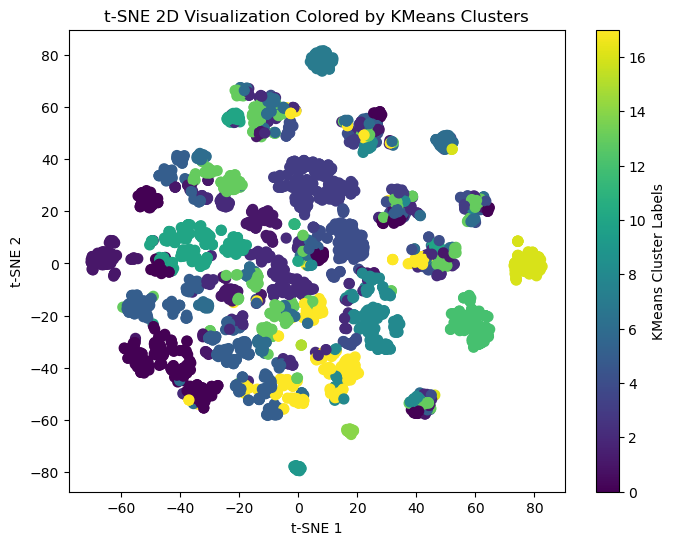

In [62]:
scaler = StandardScaler()
X_3_sample_scaled = scaler.fit_transform(X_3_dummies.sample(frac=0.1))

# Initialize KMeans with the number of clusters you expect
n_clusters = 18  # Adjust this based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=seed)

# Fit KMeans to the scaled data
kmeans.fit(X_3_sample_scaled)

# Get the cluster labels (which cluster each sample belongs to)
kmeans_labels = kmeans.labels_

# Initialize t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=seed)

# Fit t-SNE to the scaled data
X_tsne_2d = tsne.fit_transform(X_3_sample_scaled)

plt.figure(figsize=(8, 6))

# Scatter plot with colors based on KMeans clusters
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=kmeans_labels, cmap='viridis', s=50, marker='o')
plt.title('t-SNE 2D Visualization Colored by KMeans Clusters')
plt.colorbar(label='KMeans Cluster Labels')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

Make 2D plot with color corresponding to MeanShift-defined clusters:

Number of MeanShift clusters: 15


/Applications/Anaconda/anaconda3/envs/apziva/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


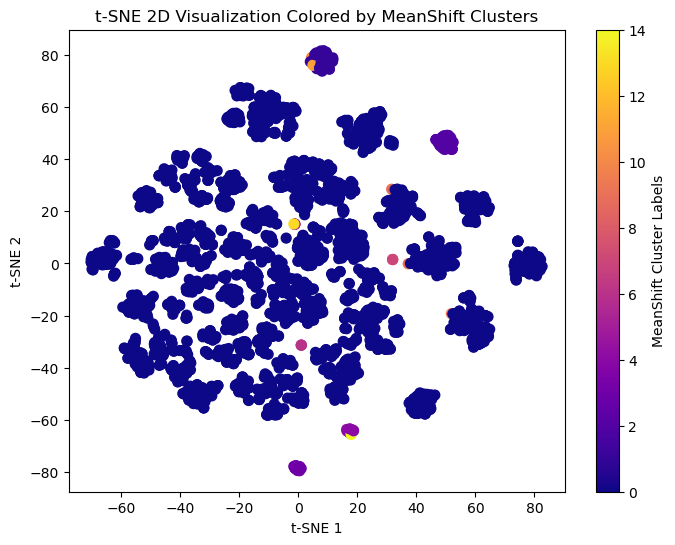

In [65]:
# Estimate the bandwidth to use in MeanShift (this is optional but recommended)
bandwidth = estimate_bandwidth(X_3_sample_scaled, quantile=0.2, n_samples=1000)

# Initialize MeanShift with the estimated bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Fit MeanShift to the scaled data
ms.fit(X_3_sample_scaled)

# Get the cluster labels from MeanShift
ms_labels = ms.labels_

# Get the number of unique clusters
n_clusters = len(np.unique(ms_labels))
print(f"Number of MeanShift clusters: {n_clusters}")

# Fit t-SNE to the scaled data (if not already done)
tsne = TSNE(n_components=2, perplexity=30, max_n_iter=1000, random_state=seed)
X_tsne_2d = tsne.fit_transform(X_3_sample_scaled)

plt.figure(figsize=(8, 6))

# Scatter plot with colors based on MeanShift clusters
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=ms_labels, cmap='plasma', s=50, marker='o')
plt.title('t-SNE 2D Visualization Colored by MeanShift Clusters')
plt.colorbar(label='MeanShift Cluster Labels')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [45]:
algorithms = {
    'kmeans': KMeans,
    'agg': AgglomerativeClustering,
    'dbscan': DBSCAN,
    'hdbscan': HDBSCAN,
    # 'meanshift': MeanShift,
    # 'spectral': SpectralClustering
}

In [46]:
clusterer = Clusterer(X_3,random_state=seed)
clusterer.train(algorithms)
clusterer.compare_models()

Columns to transform: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
Dummy variables created
Trained kmeans with score: 0.5788995737725152
Trained agg with score: 0.8639759265970759
Trained dbscan with score: -1
Trained hdbscan with score: -0.48561847117466694


KeyboardInterrupt: 

For n_clusters = 10 The average silhouette_score is : 0.08094515780658809
For n_clusters = 110 The average silhouette_score is : 0.18160414896745414
For n_clusters = 210 The average silhouette_score is : 0.20159596034829236
For n_clusters = 310 The average silhouette_score is : 0.22376430646440013
For n_clusters = 410 The average silhouette_score is : 0.23861879557024102
For n_clusters = 510 The average silhouette_score is : 0.24287218985123066
For n_clusters = 610 The average silhouette_score is : 0.24958078866669423
For n_clusters = 710 The average silhouette_score is : 0.2530584137314184
For n_clusters = 810 The average silhouette_score is : 0.26100062082275743
For n_clusters = 910 The average silhouette_score is : 0.26825549125577575


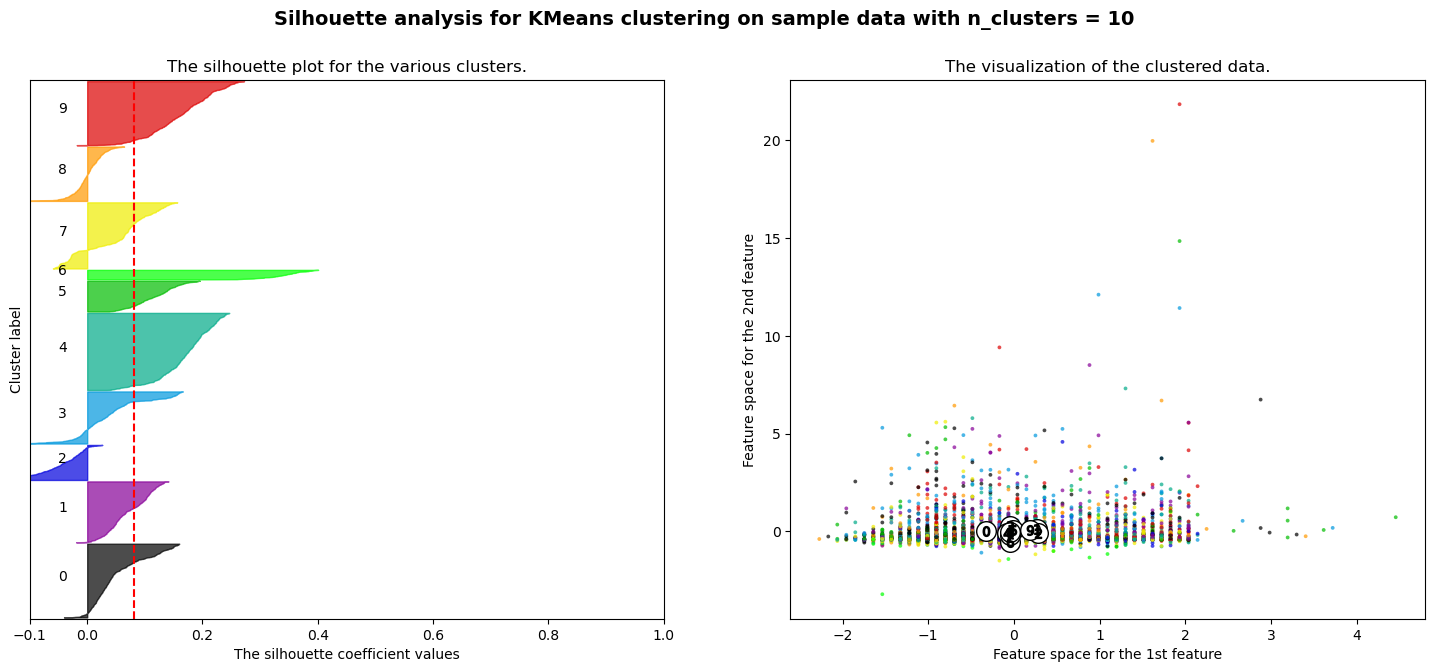

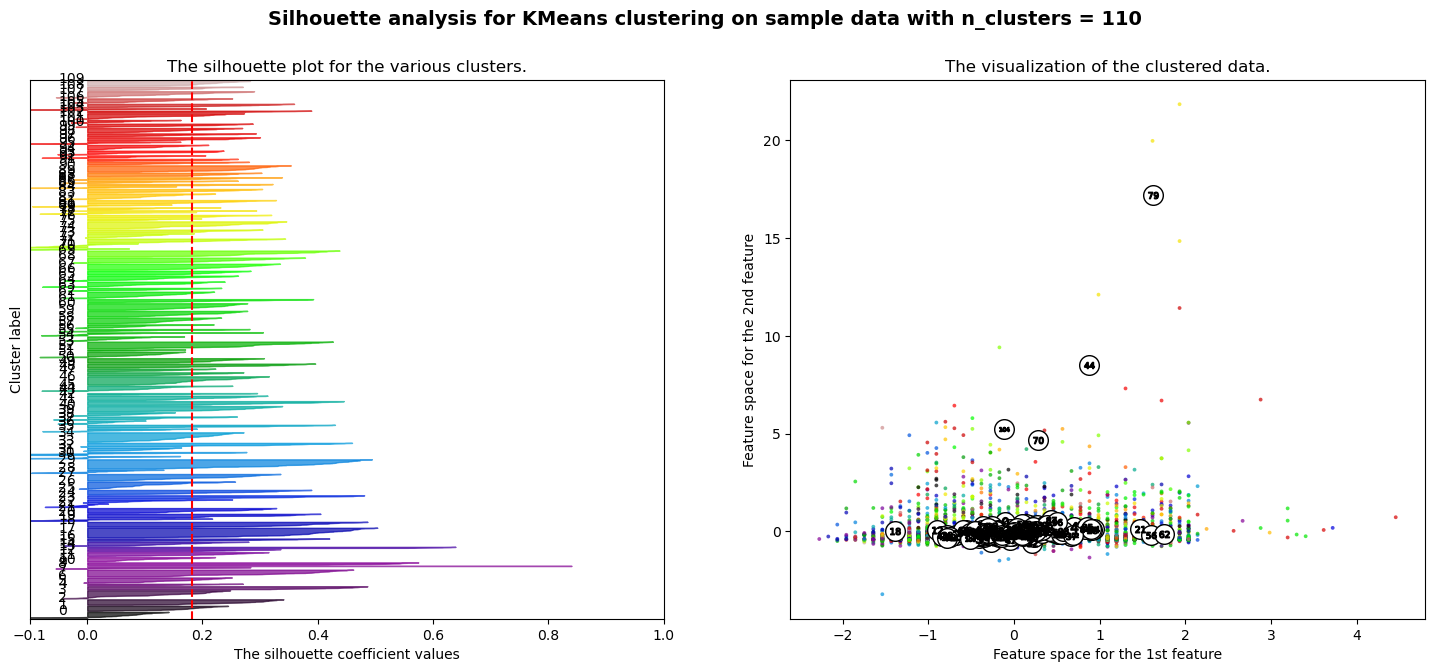

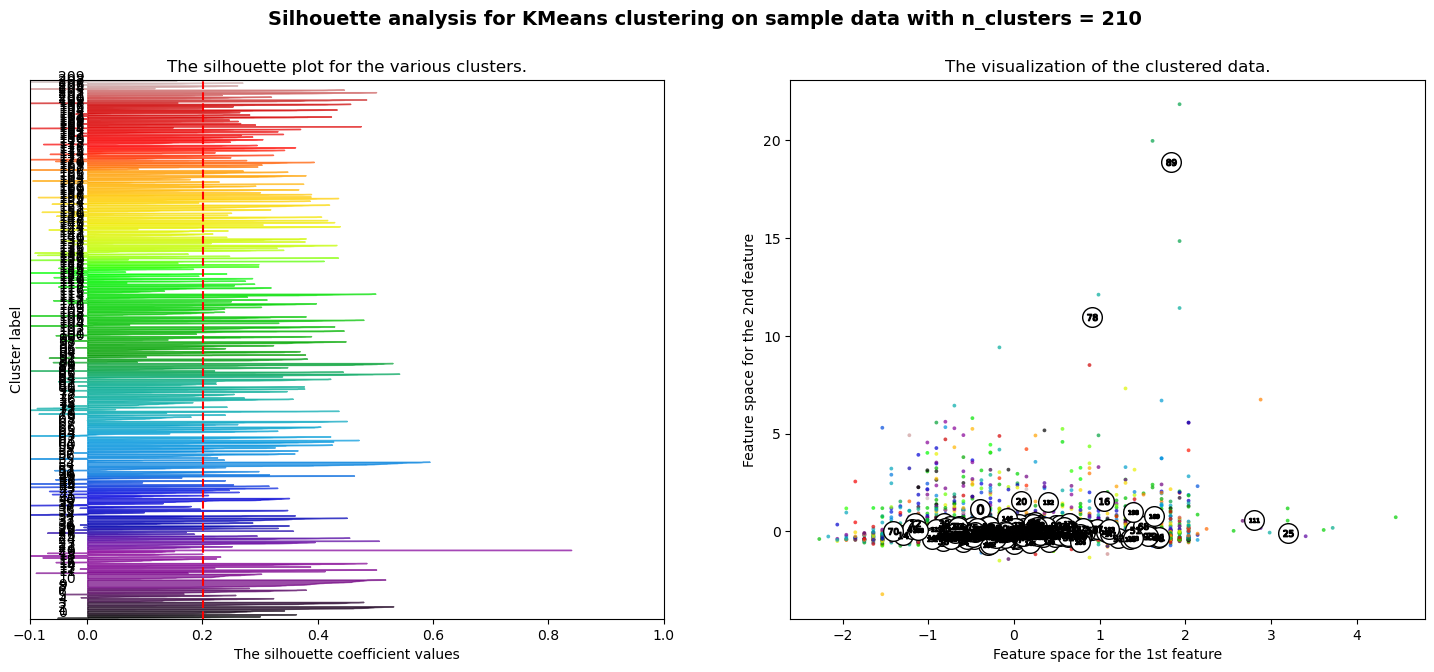

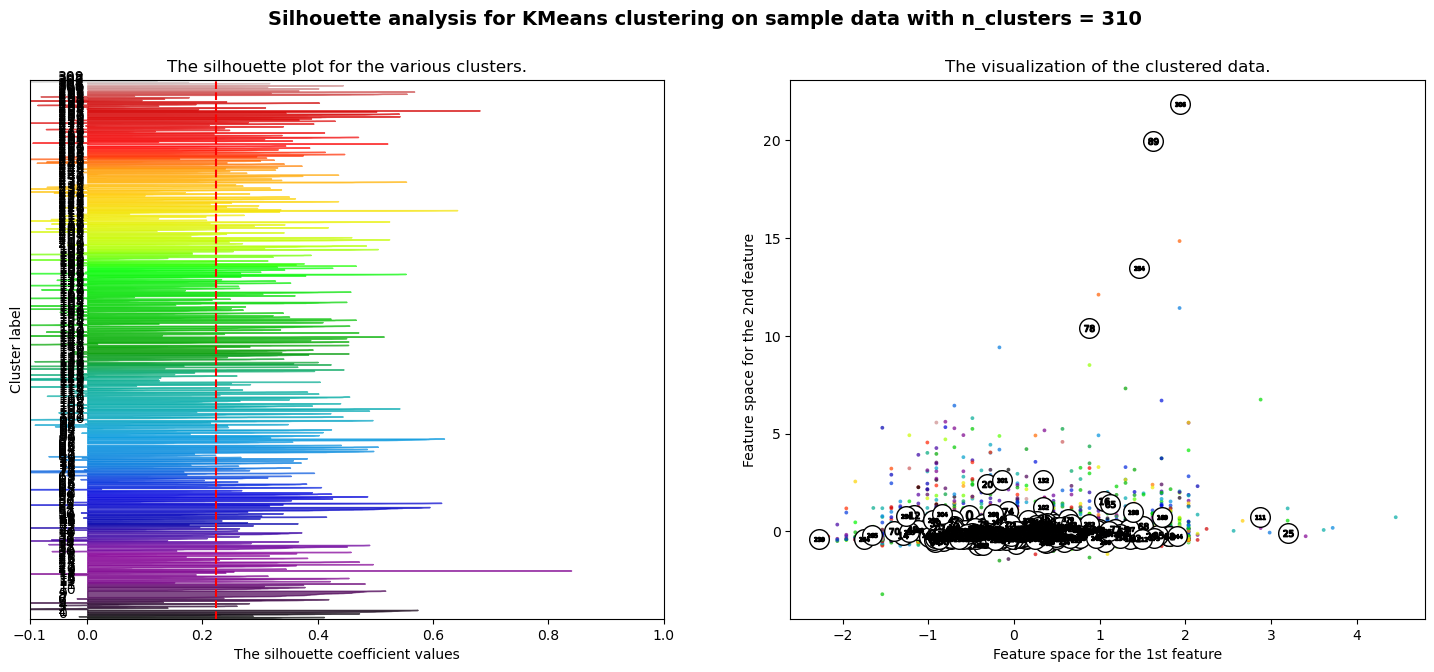

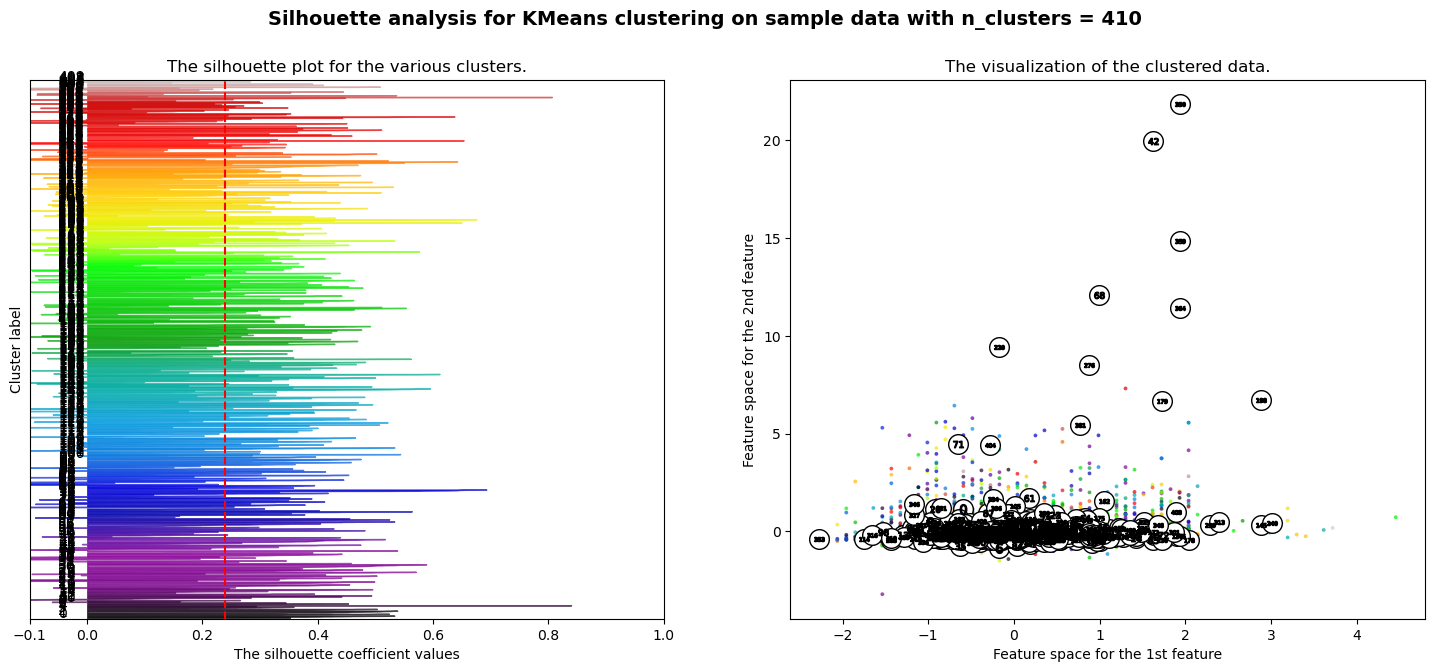

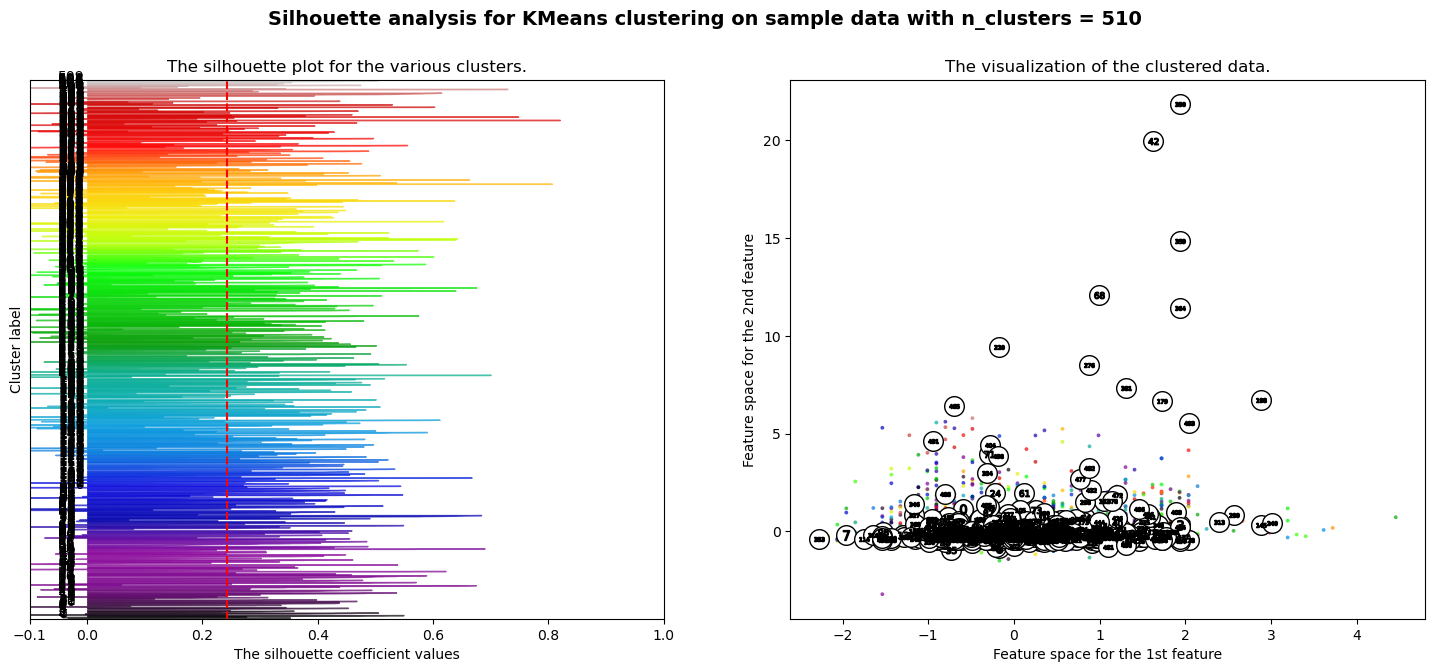

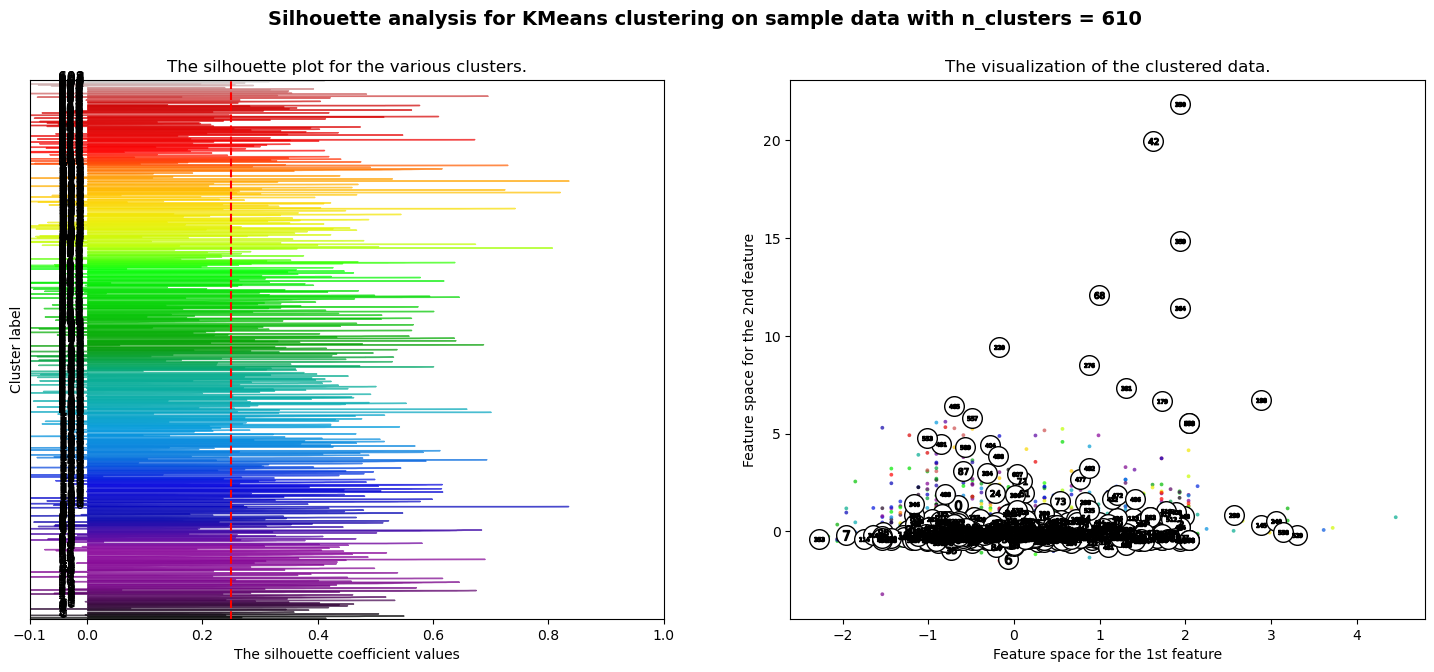

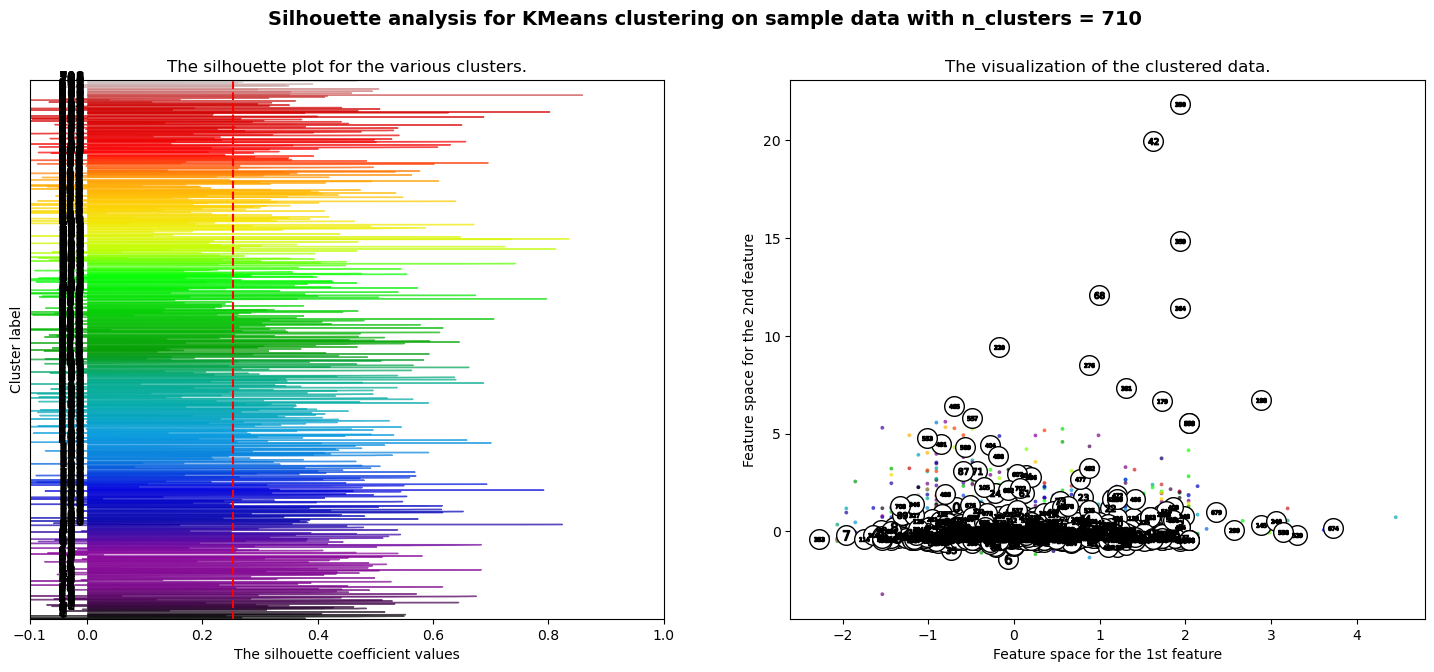

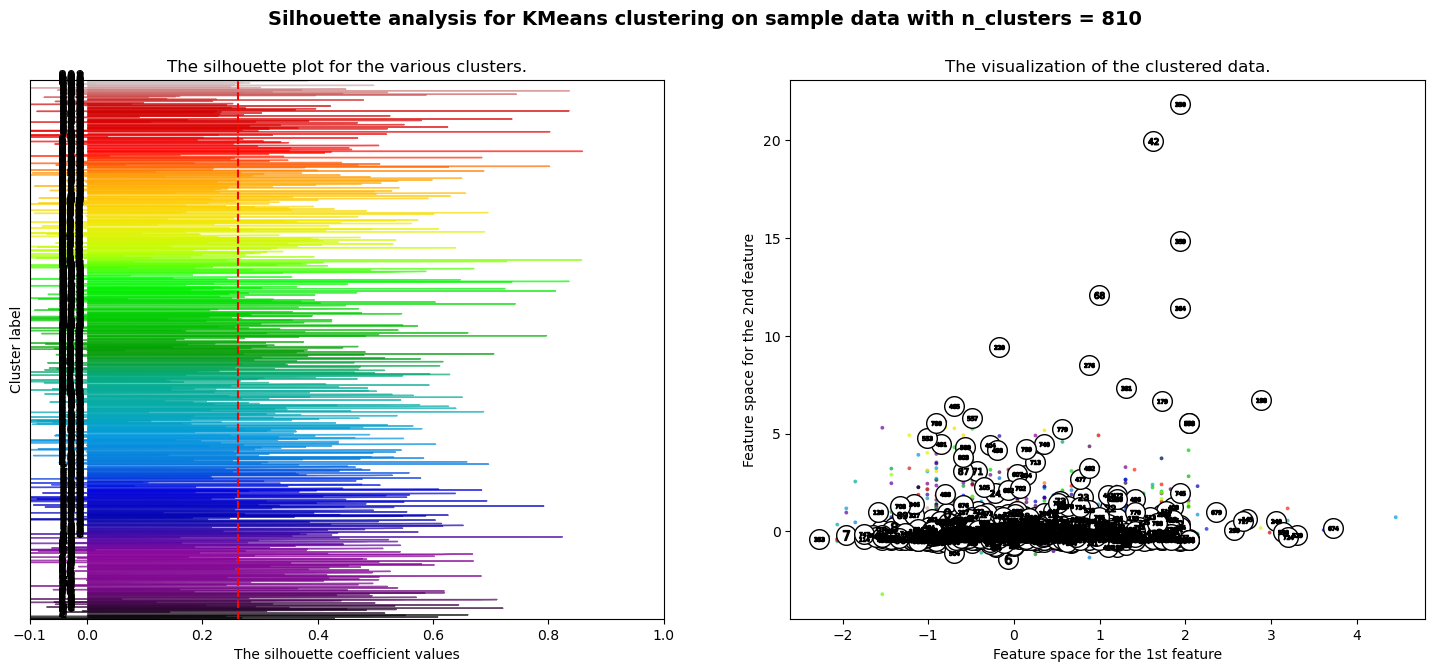

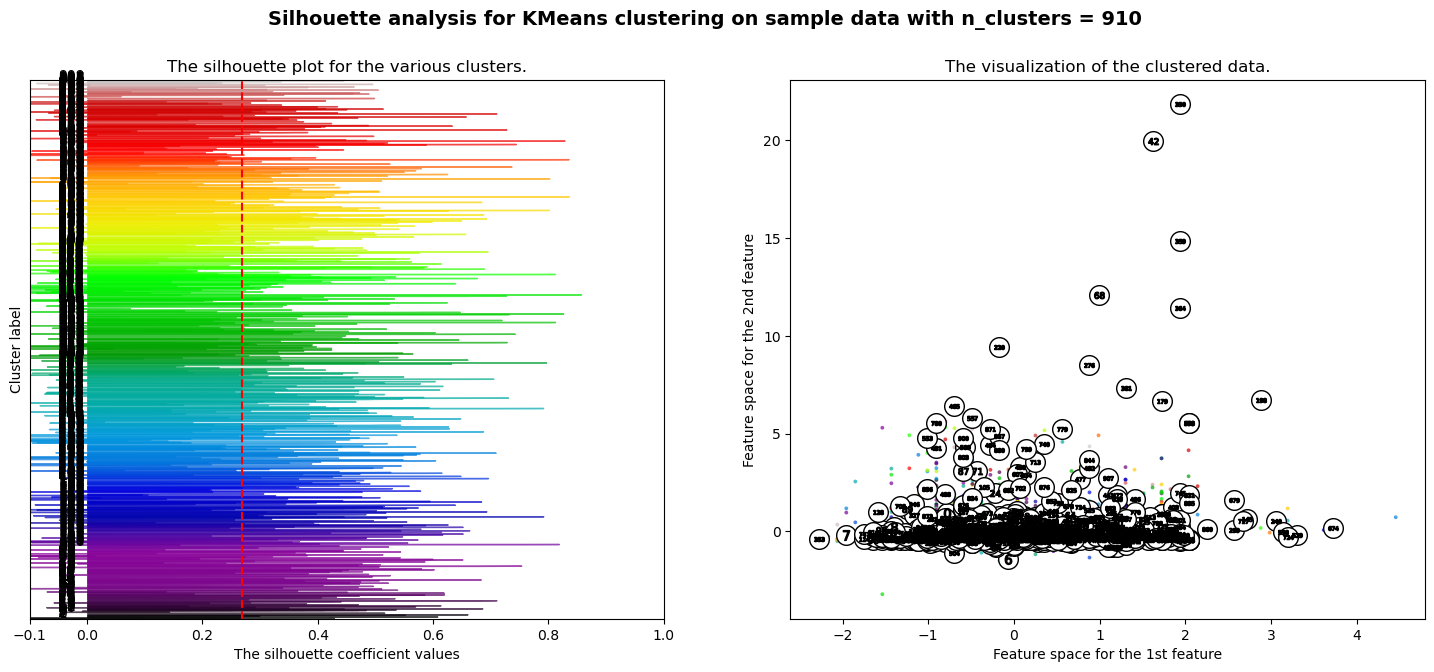

In [42]:
# silhouette plots

range_n_clusters = range(10,1001,100)

X=X_3_sample_scaled

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### `Optuna`

Now that we have the algorithm, let's work on exploring the hyperparameter space to improve the models further.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import optuna

#### Setup X and y again

In [55]:
df=pd.read_csv('../data/2_data.csv')

dbd=[ # demographic and banking data
    'age',
    'job',
    'marital',
    'education',
    'default',
    'balance',
    'housing',
    'loan'
]

csd=[ # campaign-specific data
    'contact',
    'day',
    'month',
    'duration',
    'campaign'
]

X_1=df[[col for col in df.columns if col != 'y' and col not in csd]]
y=df['y']

X_2=df[[col for col in df.columns if col != 'y']]

In [57]:
# dummify and scale the versions of X

In [62]:
cols_to_transform=[col for col in X_1.columns if is_string_dtype(X_1[col])]

X_1_dummy=pd.get_dummies(data=X_1, 
                           columns=cols_to_transform)

bool_cols=[col for col in X_1_dummy.columns if '_' in col]

X_1_dummy[bool_cols]=X_1_dummy[bool_cols].astype(int)

X_1_dummy

age  balance  job_admin  job_blue-collar  job_entrepreneur  \
0       58     2143          0                0                 0   
1       44       29          0                0                 0   
2       33        2          0                0                 1   
3       47     1506          0                1                 0   
4       33        1          0                0                 0   
...    ...      ...        ...              ...               ...   
39995   53      395          0                0                 0   
39996   30     3340          0                0                 0   
39997   54      200          1                0                 0   
39998   34     1047          0                0                 0   
39999   38     1442          0                0                 0   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                  0               1            0                  0   
1                  0               0            0                  0   
2                  0               0            0                  0   
3                  0               0            0                  0   
4                  0               0            0                  0   
...              ...             ...          ...                ...   
39995              0               0            0                  0   
39996              0               1            0                  0   
39997              0               0            0                  0   
39998              0               1            0                  0   
39999              0               0            0                  0   

       job_services  ...  education_primary  education_secondary  \
0                 0  ...                  0                    0   
1                 0  ...                  0                    1   
2                 0  ...                  0                    1   
3                 0  ...                  0                    0   
4                 0  ...                  0                    0   
...             ...  ...                ...                  ...   
39995             0  ...                  0                    0   
39996             0  ...                  0                    0   
39997             0  ...                  0                    1   
39998             0  ...                  0                    0   
39999             0  ...                  0                    1   

       education_tertiary  education_unknown  default_no  default_yes  \
0                       1                  0           1            0   
1                       0                  0           1            0   
2                       0                  0           1            0   
3                       0                  1           1            0   
4                       0                  1           1            0   
...                   ...                ...         ...          ...   
39995                   1                  0           1            0   
39996                   1                  0           1            0   
39997                   0                  0           1            0   
39998                   1                  0           1            0   
39999                   0                  0           1            0   

       housing_no  housing_yes  loan_no  loan_yes  
0               0            1        1         0  
1               0            1        1         0  
2               0            1        0         1  
3               0            1        1         0  
4               1            0        1         0  
...           ...          ...      ...       ...  
39995           1            0        1         0  
39996           1            0        1         0  
39997           1            0        1         0  
39998           1            0        1         0  
39999           0            1        1        

In [64]:
scaler=MinMaxScaler()
X_1_scaled=pd.DataFrame(scaler.fit_transform(X_1_dummy),columns=X_1_dummy.columns)

X_1_scaled

age   balance  job_admin  job_blue-collar  job_entrepreneur  \
0      0.513158  0.092259        0.0              0.0               0.0   
1      0.328947  0.073067        0.0              0.0               0.0   
2      0.184211  0.072822        0.0              0.0               1.0   
3      0.368421  0.086476        0.0              1.0               0.0   
4      0.184211  0.072812        0.0              0.0               0.0   
...         ...       ...        ...              ...               ...   
39995  0.447368  0.076390        0.0              0.0               0.0   
39996  0.144737  0.103127        0.0              0.0               0.0   
39997  0.460526  0.074619        1.0              0.0               0.0   
39998  0.197368  0.082309        0.0              0.0               0.0   
39999  0.250000  0.085895        0.0              0.0               0.0   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                0.0             1.0          0.0                0.0   
1                0.0             0.0          0.0                0.0   
2                0.0             0.0          0.0                0.0   
3                0.0             0.0          0.0                0.0   
4                0.0             0.0          0.0                0.0   
...              ...             ...          ...                ...   
39995            0.0             0.0          0.0                0.0   
39996            0.0             1.0          0.0                0.0   
39997            0.0             0.0          0.0                0.0   
39998            0.0             1.0          0.0                0.0   
39999            0.0             0.0          0.0                0.0   

       job_services  ...  education_primary  education_secondary  \
0               0.0  ...                0.0                  0.0   
1               0.0  ...                0.0                  1.0   
2               0.0  ...                0.0                  1.0   
3               0.0  ...                0.0                  0.0   
4               0.0  ...                0.0                  0.0   
...             ...  ...                ...                  ...   
39995           0.0  ...                0.0                  0.0   
39996           0.0  ...                0.0                  0.0   
39997           0.0  ...                0.0                  1.0   
39998           0.0  ...                0.0                  0.0   
39999           0.0  ...                0.0                  1.0   

       education_tertiary  education_unknown  default_no  default_yes  \
0                     1.0                0.0         1.0          0.0   
1                     0.0                0.0         1.0          0.0   
2                     0.0                0.0         1.0          0.0   
3                     0.0                1.0         1.0          0.0   
4                     0.0                1.0         1.0          0.0   
...                   ...                ...         ...          ...   
39995                 1.0                0.0         1.0          0.0   
39996                 1.0                0.0         1.0          0.0   
39997                 0.0                0.0         1.0          0.0   
39998                 1.0                0.0         1.0          0.0   
39999                 0.0                0.0         1.0          0.0   

       housing_no  housing_yes  loan_no  loan_yes  
0             0.0          1.0      1.0       0.0  
1             0.0          1.0      1.0       0.0  
2             0.0          1.0      0.0       1.0  
3             0.0          1.0      1.0       0.0  
4             1.0          0.0      1.0       0.0  
...           ...          ...      ...       ...  
39995         1.0          0.0      1.0       0.0  
39996         1.0          0.0      1.0       0.0  
39997         1.0          0.0      1.0       0.0  
39998         1.0          0.0  

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_1_scaled,
    y,
    test_size=0.2,
    random_state=seed,
    stratify=y)

#### Setup and run `optuna` with `RandomForestClassifier`

In [66]:
def objective_rfc(trial):
     # Hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 10, 1000)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    max_depth = trial.suggest_int('max_depth', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    class_weight = trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    
    # Classifier definition
    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        n_jobs=-1,
        random_state=seed
    )

    # Cross-validation to evaluate the model
    score = cross_val_score(
        classifier, 
        X_train, 
        y_train, 
        cv=5, 
        n_jobs=-1, 
        scoring='accuracy')
    
    return score.mean()

# Usage with Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective_rfc, n_trials=100)

[I 2024-09-23 20:41:38,806] A new study created in memory with name: no-name-9b97f206-698d-4f22-a607-ebe10f2eae84
[I 2024-09-23 20:41:57,706] Trial 0 finished with value: 0.66403125 and parameters: {'n_estimators': 976, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.66403125.
[I 2024-09-23 20:42:09,432] Trial 1 finished with value: 0.6307812499999998 and parameters: {'n_estimators': 793, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.66403125.
[I 2024-09-23 20:42:17,058] Trial 2 finished with value: 0.62634375 and parameters: {'n_estimators': 810, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.66403125.
[I 2024-09-23 20:42:34,123] Trial 3 finished with value: 0.6485 and parameters: {'n_estimators': 960, 'cr

##### Extract best parameters and run a tuned model

In [125]:
best_params_l1=study.best_params
best_params_l1

{'n_estimators': 759,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'bootstrap': True,
 'class_weight': 'balanced_subsample'}

In [130]:
fileDaterSaver(location='../joblib/',
               filetype='json',
               object_=best_params_l1,
               extra='2_optuna_l1')

current_datetime: 2024-09-25 22:51:44.368927
../joblib/2_optuna_l1_2024-09-25_22-51-44.json
Successfully saved object_ to ../joblib/2_optuna_l1_2024-09-25_22-51-44.json


In [136]:
file_name='../joblib/2_optuna_l1_2024-09-25_22-51-44.json'

# extract best params file
with open(file_name,'r') as file:
    best_params_l1=json.load(file)

In [137]:
params=best_params_l1

params['random_state']=seed

rfc=RandomForestClassifier(**params)

rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       max_features=None, n_estimators=759, random_state=6532)

In [79]:
# evaluate final model on test set
final_score = rfc.score(X_test, y_test)
print(f'Final test score: {final_score*100:.2f}%')

Final test score: 68.23%


In [106]:
print('no: ',y.value_counts().iloc[0]/y.count()*100)
print('yes:',y.value_counts().iloc[1]/y.count()*100)

no:  92.75999999999999
yes: 7.24


This is not a great result, which probably points to the fact that our target class is only about 7% of the entire dataset. Let's explore using the SMOTE-Tomek Links (see [here](#https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc)) and the SMOTE-ENN method (more information [here](#https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50)) to see if this helps alleviate the problem. We'll be using the code from these sources to inform our modeling strategy.

#### SMOTE-Tomek Link method

In [120]:
X_1_scaled.head()

age   balance  job_admin  job_blue-collar  job_entrepreneur  \
0  0.513158  0.092259        0.0              0.0               0.0   
1  0.328947  0.073067        0.0              0.0               0.0   
2  0.184211  0.072822        0.0              0.0               1.0   
3  0.368421  0.086476        0.0              1.0               0.0   
4  0.184211  0.072812        0.0              0.0               0.0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0            0.0             1.0          0.0                0.0   
1            0.0             0.0          0.0                0.0   
2            0.0             0.0          0.0                0.0   
3            0.0             0.0          0.0                0.0   
4            0.0             0.0          0.0                0.0   

   job_services  ...  education_primary  education_secondary  \
0           0.0  ...                0.0                  0.0   
1           0.0  ...                0.0                  1.0   
2           0.0  ...                0.0                  1.0   
3           0.0  ...                0.0                  0.0   
4           0.0  ...                0.0                  0.0   

   education_tertiary  education_unknown  default_no  default_yes  housing_no  \
0                 1.0                0.0         1.0          0.0         0.0   
1                 0.0                0.0         1.0          0.0         0.0   
2                 0.0                0.0         1.0          0.0         0.0   
3                 0.0                1.0         1.0          0.0         0.0   
4                 0.0                1.0         1.0          0.0         1.0   

   housing_yes  loan_no  loan_yes  
0          1.0      1.0       0.0  
1          1.0      1.0       0.0  
2          1.0      0.0       1.0  
3          1.0      1.0       0.0  
4          0.0      1.0       0.0  

[5 rows x 27 columns]

In [107]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

Compare one without using the method and one with:

In [138]:
params=best_params_l1

params['random_state']=seed

##### Without SMOTE-Tomek Link:

In [139]:
# without the tuned model
# without SMOTE-Tomek Link

model_ori=RandomForestClassifier(criterion='entropy')

cv_ori=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=seed)

scoring=['accuracy','precision_macro','recall_macro']
scores_ori=cross_validate(model_ori,X_1_scaled,y,scoring=scoring,cv=cv_ori,n_jobs=-1)

print(f"Mean Accuracy: {np.mean(scores_ori['test_accuracy'])}")
print(f"Mean Precision: {np.mean(scores_ori['test_precision_macro'])}")
print(f"Mean Recall: {np.mean(scores_ori['test_recall_macro'])}")

Mean Accuracy: 0.9137833333333334
Mean Precision: 0.5756964029071353
Mean Recall: 0.5271512432006427


The accuracy is high, but the precision and recall scores are very low. This shows that the model did not receive enough observations of the minority class.

In [140]:
# with the tuned model
# without SMOTE-Tomek Link

model_ori=RandomForestClassifier(**params)

cv_ori=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=seed)

scoring=['accuracy','precision_macro','recall_macro']
scores_ori=cross_validate(model_ori,X_1_scaled,y,scoring=scoring,cv=cv_ori,n_jobs=-1)

print(f"Mean Accuracy: {np.mean(scores_ori['test_accuracy'])}")
print(f"Mean Precision: {np.mean(scores_ori['test_precision_macro'])}")
print(f"Mean Recall: {np.mean(scores_ori['test_recall_macro'])}")

Mean Accuracy: 0.6643916666666667
Mean Precision: 0.5243704511578763
Mean Recall: 0.5804434871446236


I am not sure why the tuned accuracy is lower than the generic build of the algorithm.

##### With SMOTE-Tomek Link:

In [142]:
# without the tuned model
# with SMOTE-Tomek Link

model_stl=RandomForestClassifier(criterion='entropy')

# define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

pipeline=Pipeline(steps=[
    ('r',resample),
    ('m',model_stl)
])

cv_stl=RepeatedStratifiedKFold(n_splits=10,n_repeats=4,random_state=seed)

scoring=['accuracy','precision_macro','recall_macro']
scores_stl=cross_validate(pipeline,X_1_scaled,y,scoring=scoring,cv=cv_stl,n_jobs=-1)

print(f"Mean Accuracy: {np.mean(scores_stl['test_accuracy'])}")
print(f"Mean Precision: {np.mean(scores_stl['test_precision_macro'])}")
print(f"Mean Recall: {np.mean(scores_stl['test_recall_macro'])}")

Mean Accuracy: 0.77261875
Mean Precision: 0.5197880540288763
Mean Recall: 0.5463538238805535


In [143]:
# with the tuned model
# with SMOTE-Tomek Link

model_stl=RandomForestClassifier(**params)

# define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

pipeline=Pipeline(steps=[
    ('r',resample),
    ('m',model_stl)
])

cv_stl=RepeatedStratifiedKFold(n_splits=10,n_repeats=4,random_state=seed)

scoring=['accuracy','precision_macro','recall_macro']
scores_stl=cross_validate(pipeline,X_1_scaled,y,scoring=scoring,cv=cv_stl,n_jobs=-1)

print(f"Mean Accuracy: {np.mean(scores_stl['test_accuracy'])}")
print(f"Mean Precision: {np.mean(scores_stl['test_precision_macro'])}")
print(f"Mean Recall: {np.mean(scores_stl['test_recall_macro'])}")

Mean Accuracy: 0.5781562499999999
Mean Precision: 0.5197972869933901
Mean Recall: 0.5716229013265375


#### SMOTE-ENN method

In [73]:
best_model_X1=objective_rfc(study.best_trial)
best_model_X1.evaluate(X_test,y_test)[1]

AttributeError: 'numpy.float64' object has no attribute 'evaluate'

Now that we have the algorithm, let's work on exploring the hyperparameter space to improve the models further. (Although the models are reaching accuracies of comfortably above 90%, let's see how far we can push this!)

In our first run with `Optuna`, we will use the following ML algorithms by running all algorithms, each in a separate, single objective function.

* `random_forest`
* `mlp`
* `libsvm_svc`
* `decision_tree`

Once we land on a promising algorithm, we will focus on that algorithm to fine-tune its hyperaparameters.

In [ ]:
clf_list=['rfc','mlp','lsv','dtc']

In [ ]:
def objective_rfc(trial):
    classifier_name=trial.suggest_categorical('classifier',clf_list)

    if classifier_name==clf_list[0]:
        params=[]
        n_estimators=trial.suggest_int('n_estimators',10,1000)
        criterion=trial.suggest_categorical('criterion',['gini','entropy','log_loss'])
        max_depth=trial.suggest_int('max_depth',1,5)
        max_features=trial.suggest_categorical('max_features',['sqrt', 'log2', None])
        bootstrap=trial.suggest_categorical('bootstrap',[True,False])
        n_jobs=-1
        random_state=seed
        class_weight=trial.suggest_categorical('class_weight',['balanced','balanced_subsample'])
        params.append(n_estimators,criterion,max_depth,max_features,bootstrap,n_jobs,random_state,class_weight)
        classifier=RandomForestClassifier(**params)

def objective_mlp(trial):
    if classifier_name==clf_list[1]:
        params=[]
        hidden_layer_sizes=trial.suggest_int('hidden_layer_sizes',100,1000)
        activation=trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu'])
        solver=trial.suggest_categorical('solver',['lbfgs','sgd','adam'])


In [ ]:
aml_results=pd.DataFrame(data=aml_results_exp.iloc[0,:])
aml_results

0
mean_test_score                                        0.934943
rank_test_scores                                              1
mean_fit_time                                         56.599535
status                                                  Success
budgets                                                     0.0
...                                                         ...
data_preprocessor:feature_type:numerical_transf...  standardize
data_preprocessor:feature_type:numerical_transf...          NaN
data_preprocessor:feature_type:numerical_transf...          NaN
data_preprocessor:feature_type:numerical_transf...          NaN
data_preprocessor:feature_type:numerical_transf...          NaN

[180 rows x 1 columns]

Then, using the parameters `hyperopt` found, we'll train the model and test its accuracy:

In [ ]:


# Define Optuna objective function for hyperparameter tuning
def objective(trial):
    params = {
        'ensemble_size': trial.suggest_int('ensemble_size', 10, 50),
        'initial_configurations_via_metalearning': trial.suggest_int('initial_configurations_via_metalearning', 0, 25)
    }

    automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=60, per_run_time_limit=30,
        ensemble_size=params['ensemble_size'],
        initial_configurations_via_metalearning=params['initial_configurations_via_metalearning']
    )

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', automl)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters
print(f"Best hyperparameters: {study.best_params}")

# Use the best hyperparameters found by Optuna to fit and evaluate the final model
best_params = study.best_params
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60, per_run_time_limit=30,
    ensemble_size=best_params['ensemble_size'],
    initial_configurations_via_metalearning=best_params['initial_configurations_via_metalearning']
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', automl)])
pipeline.fit(X_train, y_train)

# Evaluate the final model
y_pred = pipeline.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final accuracy: {final_accuracy:.2f}")